<h3>Problem Statement:</h3>

# Sentiment Analysis using Amazon Fine Food Reviews

This dataset consists of reviews of fine foods from Amazon. For a given review, determining whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

### Background of the Problem:

This data spans more than ten years and includes over 500k customer reviews as of October 2012. Reviews contain information on the product and the user, as well as ratings and simple language. Additionally, all other Amazon categories reviews are included. This dataset is available on the Kaggle website (https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews).


### Significance of the problem:

1) The reviews in this dataset are actual consumer-generated content from the Amazon platform. This means it reflects the language, writing style, and sentiments expressed by real people when reviewing food products.

2) The dataset spans over a decade, allowing for the analysis of changing trends and sentiments over time. This longitudinal perspective can be valuable for understanding how consumer opinions about food products evolve.

### This Project Potential towards Sentiment Analysis:

1) It poses various natural language processing (NLP) challenges like dealing with stopwords,stemming, and Lemmatization . This makes it a good benchmark for evaluating the robustness of sentiment analysis models.

2) The dataset is not limited to a specific category of food products. It covers a wide range of food items, making it applicable to a broad spectrum of food-related sentiment analysis tasks.

3) The dataset contains a wide range of opinions, from highly positive to highly negative, as well as neutral reviews. This diversity is important for training models that can handle various sentiment expressions.

### Overview of Dataset:

Number of reviews: 568,454 </br>
Number of users: 256,059 </br>
Number of products: 74,258 </br>
Timespan: Oct 1999 — Oct 2012 </br>
Number of Attributes/Columns in data: 10 </br>

### Attributes Information:

Id - Amazon Customer ID</br>
ProductId — unique identifier for the product </br>
UserId — unqiue identifier for the user </br>
ProfileName - Profile Name of the Customer </br>
HelpfulnessNumerator — number of users who found the review helpful </br>
HelpfulnessDenominator — number of users who found the review helpful or not </br>
Score — rating between 1 to 5 </br>
Time — timestamp for the review </br>
Summary — brief summary of the review </br>
Text — text of the review </br>

### Source for this Dataset:

This dataset is available on the Kaggle website </br>
<h5>Link :</h5> <a>https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews </a>

### Data Cleaning/PreProcessing : 

In [486]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
import tqdm as tqdm
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import pickle

### Loading the dataset

In [487]:
raw_data= pd.read_csv("/Users/mohithsainattam/Desktop/Reviews.csv")
raw_data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

### Shape or size of our dataset

In [488]:
raw_data.shape

(568454, 10)

We can see that 500K users reviewed for the product and there are 10 different type of feature colums given in our dataset

### Count of respective scores for all the reviews

<Axes: >

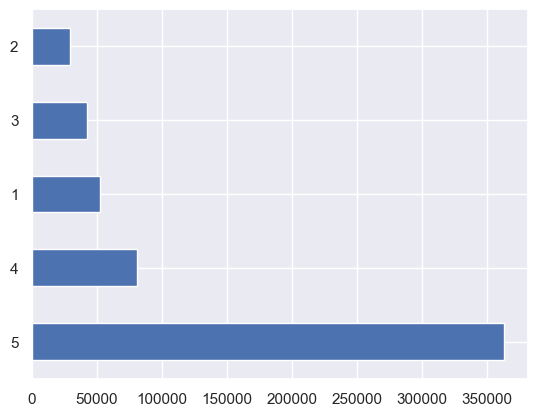

In [489]:
raw_data['Score'].value_counts().plot(kind = 'barh')

1) we can see that data is imbalanced and dataset consist of more 5 rating reviews and more positive reviews(score>3) compared to negative reviews.

In [490]:
filtered_data = raw_data[raw_data['Score']!=3]
filtered_data.shape

(525814, 10)

1) we consider score = 3 as neutral and this cannot be used to judge if user is positive or negative towards the product review. So, we eliminate or clean those data points in our dataset

<Axes: >

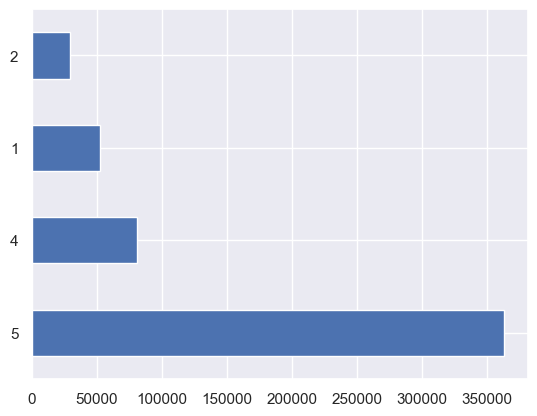

In [491]:
filtered_data['Score'].value_counts().plot(kind = 'barh')

### Converting Score(numeric data) to binary classification label

In [492]:
warnings.filterwarnings('ignore')
def partition(x):
    if x<3:
        return 'negative'
    else:
        return 'positive'
dummy_data=filtered_data['Score']
review_column_data=dummy_data.map(partition)
filtered_data['Score']=review_column_data
print(filtered_data.shape)
filtered_data.head()

(525814, 10)


Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator     Score        Time  \
0                     1                       1  positive  1303862400   
1                     0                       0  negative  1346976000   
2                     1                       1  positive  1219017600   
3                     3                       3  negative  1307923200   
4                     0                       0  positive  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

1) We have converted scores>3 as positive and scores<3 as negative , so our problem is now a binary class classification problem

In [493]:
filtered_data['Score'].value_counts()

positive    443777
negative     82037
Name: Score, dtype: int64

### 2. Drop Duplicates

In [494]:
duplicates = filtered_data[filtered_data.duplicated(['ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary','Text'])]
print(duplicates.shape)
duplicates

(256, 10)


Id   ProductId          UserId  \
6517      6518  B005O8BLLU   APH7I7OZ8WUJP   
15528    15529  B000255OIG   AJD41FBJD9010   
19705    19706  B0030VBRIU   A2MF0C4E7GYCI   
20416    20417  B001BDDTB2   AF3BYMPWKWO8F   
21114    21115  B002QWP89S  A10NJPL8SA82WC   
...        ...         ...             ...   
536289  536290  B0051ZCNIQ   AMQ1MEG334SAP   
539359  539360  B001BDDT8K   AF3BYMPWKWO8F   
541565  541566  B00014JYNO    AM820RV0VN0U   
546112  546113  B003YSV5ZY  A2GSNN6EH9K2HD   
567958  567959  B0030VJ8YU   A2MF0C4E7GYCI   

                                         ProfileName  HelpfulnessNumerator  \
6517                                      J. Simpson                     0   
15528   N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   
19705                                        VW "VW"                     0   
20416                                      Joe MacBu                     3   
21114                                       STANIMAL                     0   
...                                              ...                   ...   
536289                                        Bigmac                     0   
539359                                     Joe MacBu                     3   
541565                                     windie809                     0   
546112                                      A. Meyer                     0   
567958                                       VW "VW"                     0   

        HelpfulnessDenominator     Score        Time  \
6517                         0  positive  1347494400   
15528                        0  positive  1233360000   
19705                        0  positive  1305331200   
20416                        3  negative  1243555200   
21114                        0  positive  1343779200   
...                        ...       ...         ...   
536289                       3  negative  1332892800   
539359                       3  negative  1243555200   
541565                       0  positive  1339459200   
546112                       0  positive  1301875200   
567958                       0  positive  1305331200   

                                                  Summary  \
6517                                     Great first food   
15528   best dog treat-- great for training---  all do...   
19705                                   My son loves this   
20416                         Warning: Contains Menadione   
21114                                     Awesome Product   
...                                                   ...   
536289   My Dog Wouldn't Touch this with a Ten Foot Pole!   
539359                        Warning: Contains Menadione   
541565                           love these protein bars!   
546112                                         Very Tasty   
567958                                  My son loves this   

                                                     Text  
6517    This is excellent for a baby's first taste. Th...  
15528   Freeze dried liver has a hypnotic effect on do...  
19705   My son loves this food.  He is 16 months now a...  
20416   According to the manufacturer's website, this ...  
21114   These things are awesome.  These Greenies real...  
...                                                   ...  
536289  My dog seems to be allergic to poultry so we t...  
539359  According to the manufacturer's website, this ...  
541565  if you are looking for a protein bar that does...  
546112  These cereal bars are fantastic. All of their ...  
567958  My son loves this food.  He is 16 months now a...  

[256 rows x 10 columns]

1) We can see that there are 256 rows of duplicates found for one product and same user in our dataset that needs to be eliminated.

In [495]:
sorted_data=filtered_data.sort_values('ProductId',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')
print(sorted_data.shape)
sorted_data.head()

(525814, 10)


Id   ProductId          UserId                  ProfileName  \
150523  150524  0006641040   ACITT7DI6IDDL              shari zychinski   
150505  150506  0006641040  A2IW4PEEKO2R0U                        Tracy   
150506  150507  0006641040  A1S4A3IQ2MU7V4        sally sue "sally sue"   
150507  150508  0006641040     AZGXZ2UUK6X  Catherine Hallberg "(Kate)"   
150508  150509  0006641040  A3CMRKGE0P909G                       Teresa   

        HelpfulnessNumerator  HelpfulnessDenominator     Score        Time  \
150523                     0                       0  positive   939340800   
150505                     1                       1  positive  1194739200   
150506                     1                       1  positive  1191456000   
150507                     1                       1  positive  1076025600   
150508                     3                       4  positive  1018396800   

                                           Summary  \
150523                   EVERY book is educational   
150505  Love the book, miss the hard cover version   
150506               chicken soup with rice months   
150507      a good swingy rhythm for reading aloud   
150508             A great way to learn the months   

                                                     Text  
150523  this witty little book makes my son laugh at l...  
150505  I grew up reading these Sendak books, and watc...  
150506  This is a fun way for children to learn their ...  
150507  This is a great little book to read aloud- it ...  
150508  This is a book of poetry about the months of t...

1) sorting the data before removing duplicates, so that we get the first review of every duplicated record

In [496]:
#drop_duplicates
final_data=sorted_data.drop_duplicates(subset={'ProfileName','UserId','Time','Text'},keep='first',inplace=False)
print(final_data.shape)

(364173, 10)


1) So, after eliminating the duplicate records in our dataset, we now have 364K reviews from 500k original dataset

#### 3. Finding Invalid data and cleaning

In [497]:
#HelpfulnessNumerator should be less than HelpfulnessDenominator. checking if any records are invalid with this scenerio.
invalid_rows = final_data[final_data['HelpfulnessNumerator'] > final_data['HelpfulnessDenominator']]
invalid_rows

Id   ProductId          UserId              ProfileName  \
64421  64422  B000MIDROQ  A161DK06JJMCYF  J. E. Stephens "Jeanne"   
44736  44737  B001EQ55RW  A2V0I904FH7ABY                      Ram   

       HelpfulnessNumerator  HelpfulnessDenominator     Score        Time  \
64421                     3                       1  positive  1224892800   
44736                     3                       2  positive  1212883200   

                                            Summary  \
64421             Bought This for My Son at College   
44736  Pure cocoa taste with crunchy almonds inside   

                                                    Text  
64421  My son loves spaghetti so I didn't hesitate or...  
44736  It was almost a 'love at first bite' - the per...

1) we see that there are two records with HelpfulnessNumerator greater than HelpfulnessDenominator, which is practically not posible as HelpfulnessNumerator represents how many customers find the review to be only helpful whereas HelpfulnessDenominator represents how many customers find the review to be both helpful and not helpful(few may find helpful and few may find not helpful. summation of both is HelpfulnessDenominator).

In [498]:
final_data=final_data[final_data.HelpfulnessNumerator<=final_data.HelpfulnessDenominator]
final_data.shape

(364171, 10)

### 4.Checking on any missing values in our dataset

In [499]:
missing_data_percentage = (final_data.isna().mean() * 100).round(2)
missing_data_percentage

Id                        0.0
ProductId                 0.0
UserId                    0.0
ProfileName               0.0
HelpfulnessNumerator      0.0
HelpfulnessDenominator    0.0
Score                     0.0
Time                      0.0
Summary                   0.0
Text                      0.0
dtype: float64

There is no missing values in our dataset.

In [500]:
(final_data.size/raw_data.size)*100

64.06340706547935

We can see that after cleaning the data , we have obtained records for 64% of our original dataset. we have cleaned rest of 36% of the data.

In [501]:
final_data['Score'].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

we can see that our data consists of more positive reviews and less number of negative reviews. So, our dataset is imbalanced. Models may not perform well for imbalanced datasets. So, we should take balanced amount of positive and negative reviews.

### Balancing the dataset

In [502]:
positive_reviews=final_data[final_data['Score'] == 'positive'].sample(n=2000, random_state=42)
negative_reviews=final_data[final_data['Score'] == 'negative'].sample(n=2000, random_state=42)
final_balanced_data=pd.concat([positive_reviews, negative_reviews])
print(final_balanced_data.iloc[0])
print('*************************************************************')
print(final_balanced_data.iloc[2001])

Id                                                                   488542
ProductId                                                        B0014GSMAY
UserId                                                       A1RS0JUYPXFKX3
ProfileName                                                           Geoff
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                              positive
Time                                                             1316995200
Summary                                                       My Childhood!
Text                      theres not much to say here. they deliver exac...
Name: 488541, dtype: object
*************************************************************
Id                                                                   345972
ProductId                                                        B004TJF3B

1) we have randomly sampled 20k positive reviews and 20k negative reviews and combined those to balance our dataset.

<Axes: >

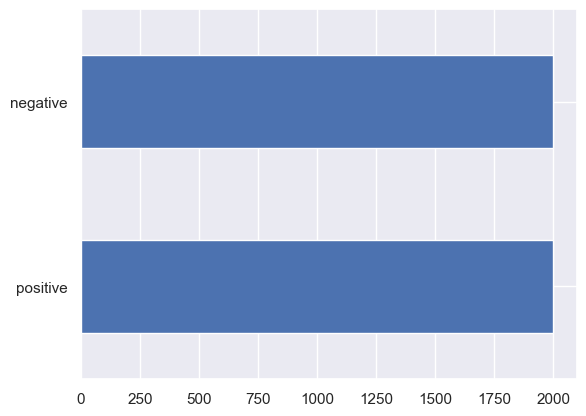

In [503]:
final_balanced_data['Score'].value_counts().plot(kind='barh')

1) Above plot shows that our dataset is balanced with equal count of both positive and negative reviews

### Text Preprocessing

#### 5. Removing HTML tags in our review text

In [504]:
#printing html tags in one of our review text

count=0
for sent in final_balanced_data['Text'].values:
    if(len(re.findall('<.*?>',sent))):
        print(sent)
        break
    count+=1
print(count)

Great Idea.  Saves money, and you have your choice of<br />coffee.  I have told several others about this easy and<br />creative new product.  Thank you Amazon.
3


1) From the above text, we can clearly see that there are some HTML tags between our review text, which is of no meaning and should be cleaned in our dataset

####  Functions to remove html tags.

In [505]:
#defining functions for removing html tags and punctuations
def removehtml(review_text):
    clean_html = re.compile('<.*?>')
    cleantext = re.sub(clean_html, ' ', review_text)
    return cleantext

#### 6. Removing punctuations in our review text

In [506]:
#### Functions to remove punctuations.

In [507]:
def removepunc(review_text):
    cleaned_punc = re.sub(r'[?|!|\'|"|#]',r'',review_text)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned_punc)
    return  cleaned

#### 7. Removing stopwords in the text data

In [508]:
warnings.filterwarnings('ignore')
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
stopwords = set(stopwords_list)

print(stopwords)

{'the', 'your', 'each', "mightn't", 're', 'why', "you're", 'didn', 'while', 'further', 'now', 'a', 'them', 'all', 'how', "haven't", 'some', "isn't", "you've", 'which', "it's", 'over', 'such', 'mustn', 'any', 'who', 'not', "wasn't", 'ma', 'and', 'my', 'on', 'again', 'but', 'off', 'd', 'so', 'we', 'him', 'out', 'shouldn', 'weren', 'wouldn', 'it', 'wasn', 'isn', "hasn't", 'theirs', 'yourselves', 'there', 'be', 'has', 'won', 'whom', 'from', 'should', 'o', 'themselves', 'above', "doesn't", 'no', 'll', 'himself', 'ours', 'below', 'up', 'only', "hadn't", 'i', 'did', 'if', "you'd", 'don', 'through', 'm', 'until', 'when', 've', 's', 'very', 'couldn', 'his', 'herself', 'their', 'by', "aren't", 'you', "she's", 'down', 'needn', "shouldn't", 'that', 'those', 't', 'under', 'an', 'what', 'hers', 'haven', 'where', 'about', 'doesn', 'hadn', "couldn't", 'having', 'at', 'during', 'more', 'being', 'hasn', "didn't", 'because', 'shan', 'few', 'own', 'been', 'y', 'before', 'or', 'itself', 'for', "won't", 'th

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohithsainattam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 8. performing stemming to our text data

In [509]:
sn = nltk.stem.SnowballStemmer('english')
print(sn.stem('tasty'))

tasti


1) Above words are considered to be stopwords(which are language specific and has no influence in defining the meaning of sentence) and can be eliminated from the text. Also, we perform stemming for each word to eliminate data like (tasty, tastful,taste to tasti, which gives same meaning and with only one word) to achieve lemmatization.

In [510]:
a=0
string1=' '
final_string=[]
all_positive_words=[]
all_negative_words=[] 
s=''
for sentence in final_balanced_data['Text'].values:
    filtered_sentence=[]
    sent=removehtml(sentence) # remove HTMl tags
    for word in sent.split():
        for cleaned_words in removepunc(word).split(): #remove puncuations
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stopwords): #Removing stopwords
                    sen=(sn.stem(cleaned_words.lower())).encode('utf8') #perform stemming and encoding
                    filtered_sentence.append(sen)
                    if (final_balanced_data['Score'].values)[a] == 'positive': 
                        all_positive_words.append(sen) 
                    if(final_balanced_data['Score'].values)[a] == 'negative':
                        all_negative_words.append(sen) 
                else:
                    continue
            else:
                continue 
    string1 = b" ".join(filtered_sentence) 
    
    final_string.append(string1)
    a+=1

#### 9. Adding CleanedText column to our dataset

In [511]:
#adding a column of CleanedText which displays the data after pre-processing of the review
final_balanced_data['CleanedText']=final_string  
final_balanced_data['CleanedText']=final_balanced_data['CleanedText'].str.decode("utf-8")
print(final_balanced_data.shape)
final_balanced_data.head()

(4000, 11)


Id   ProductId          UserId  ProfileName  HelpfulnessNumerator  \
488541  488542  B0014GSMAY  A1RS0JUYPXFKX3        Geoff                     0   
74886    74887  B0026RQTGE  A1FLQKJL2XN12C      calgolf                     0   
181569  181570  B001QV3CMA   A5LYMUAISD5M8         Lori                     1   
184077  184078  B00764BRS2  A1PWAUE5H4QH7P         M.J.                     1   
97441    97442  B001ONRO3S  A1SCW0NDANDXND  EarlyReader                     2   

        HelpfulnessDenominator     Score        Time  \
488541                       0  positive  1316995200   
74886                        0  positive  1325116800   
181569                       1  positive  1291075200   
184077                       1  positive  1330041600   
97441                        2  positive  1315872000   

                           Summary  \
488541               My Childhood!   
74886          Greenies for my dog   
181569                  Delicious!   
184077        K-Cups-New At Amazon   
97441   Who doesn't love cheez-its   

                                                     Text  \
488541  theres not much to say here. they deliver exac...   
74886   I have used them for years.  My dog can't wait...   
181569  I was in an Italian restaurant in Atlantic Cit...   
184077  Great Idea.  Saves money, and you have your ch...   
97441   The ability to subscribe and save is amazing, ...   

                                              CleanedText  
488541  there much say deliv exact see like ate kid un...  
74886   use year dog cant wait get one morn greeni dan...  
181569  italian restaur atlant citi oliv oil tabl cour...  
184077  great idea save money choic coffe told sever o...  
97441   abil subscrib save amaz honesti doesnt love es...

1) We have added new column named "CleanedText" with this cleaned punctuations, HTML tags,stemming, lemmatization,removing special characters and alphanumeric data. We have also converted the text to utf-8 encoding for further text to vector supporting.

In [512]:
# printing some random reviews
#positive reviews
review1 = final_balanced_data['CleanedText'].values[0]
print(review1)
print("-"*50)

review2 = final_balanced_data['CleanedText'].values[1000]
print(review2)
print("-"*50)

#negative reviews
review3 = final_balanced_data['CleanedText'].values[2001]
print(review3)
print("-"*50)

review4 = final_balanced_data['CleanedText'].values[3900]
print(review4)
print("-"*50)

there much say deliv exact see like ate kid unhealthi yummi
--------------------------------------------------
love oatmeal cooki made least hundr time love cooki come close second bake soft homemad vanish oatmeal cooki there ingredi cooki dont find kitchen cabinet your prepackag food shouldnt bother love allspic tast guy friend didnt much think hes partial cooki individu serv size nice apt one cooki way rather open whole box eat get stale could say individu wrap cooki save one one delici make feel like eat someth somewhat healthi oatmeal cooki
--------------------------------------------------
thought buy regular hot cider cup got home saw label disappoint sinc read review amazon usual use splenda beverag tast cider drink notic artifici could bare get recommend seventeen cup
--------------------------------------------------
bottl seal open cover black crusti stuff top gross send back
--------------------------------------------------


### 10.Sorting the data based on timestamp

In [513]:
# converting timestamp to datetime and sorting the data
final_balanced_data['Time']=pd.to_datetime(final_balanced_data['Time'],unit='s')
final_balanced_data=final_balanced_data.sort_values(by='Time')
final_balanced_data.head()

Id   ProductId          UserId  \
374357  374358  B00004CI84  A1HWMNSQF14MP8   
30627    30628  B00008RCMI  A3AKWA5CWSKOOH   
183742  183743  B0000TBK64  A15AW5ZZIPGH0L   
448629  448630  B000673RAC  A3D6TFYRMIV3ZL   
376099  376100  B0000DBN1Q  A2752XIGJY2YH6   

                                             ProfileName  \
374357                                 will@socialaw.com   
30627   Ilaxi S. Patel "Editor, kidsfreesouls.com & A...   
183742                                     David A. Kosa   
448629                                     Themis-Athena   
376099                 Mister Quickly "Amazon epicurean"   

        HelpfulnessNumerator  HelpfulnessDenominator     Score       Time  \
374357                     1                       2  positive 2000-12-30   
30627                      0                       0  positive 2003-11-06   
183742                     4                       4  positive 2004-06-07   
448629                    15                      16  positive 2004-11-10   
376099                     4                      13  negative 2004-12-12   

                           Summary  \
374357         A Afterlife Success   
30627   Refreshing Mouth Freshner!   
183742       A GOURMET Dressing!!!   
448629           The King of Teas.   
376099    should make bigger boxes   

                                                     Text  \
374357  Many movies, have dealt with the figure of dea...   
30627   A tennis player hubby of mine got this pack on...   
183742  This dressing is absolutely delicious.  It is ...   
448629  Unquestionably the most refined of teas, Darje...   
376099  24 teabags isn't even enough for one pot. Perh...   

                                              CleanedText  
374357  mani movi dealt figur death dead good angel cl...  
30627   tenni player hubbi mine got pack rack opel cor...  
183742  dress absolut delici light palat fill mouth pl...  
448629  unquestion refin tea darjeel come region india...  
376099  teabag isnt even enough one pot perhap tast ru...

1) In the real world unseen data, we get the reviews that are latest. So, its better to train our model with old timestamp data and test the model with new timestamp data to perform well on real world unseen data(which is of latest time). As the time varies customer intrest may vary or product quality may vary. So, take this into consideration we perform sorting based on timestamp

### Featurization - EDA

#### 1. Word Frequency Analysis

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohithsainattam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


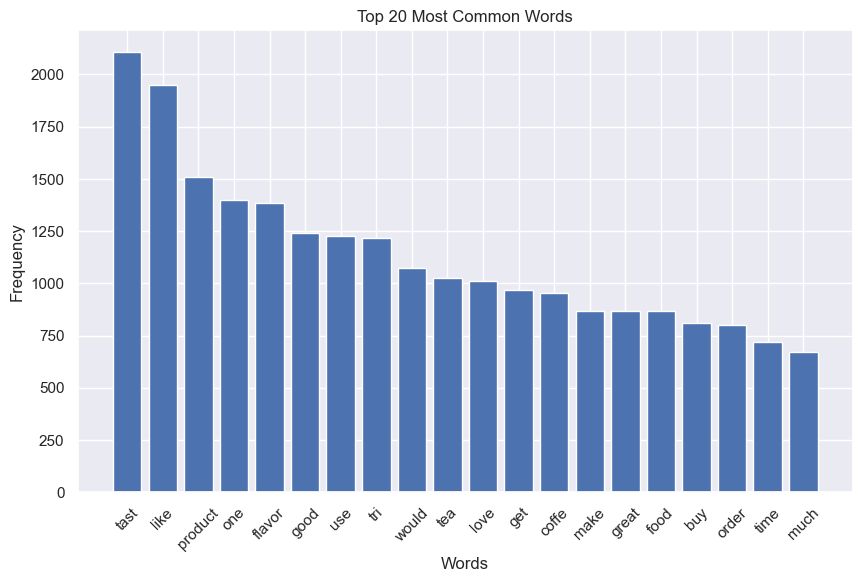

In [514]:
nltk.download('punkt')
final_balanced_data['Tokenized_Text'] = final_balanced_data['CleanedText'].apply(lambda x: word_tokenize(x.lower()))

# Flatten the list of tokens
all_words = [word for tokens in final_balanced_data['Tokenized_Text'] for word in tokens]

# Calculate word frequencies
freq_dist = FreqDist(all_words)

# Get the most common words
top_words = freq_dist.most_common(20)

# Convert to a DataFrame for visualization
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

1) Analyze the frequency distribution of words in the dataset to understand which words are most used. This Analysis will help us to check the weightage of words when the text is converted to vectors before modelling. Also, we have added new column with "Tokenized_Text" that has list of words in our sentences. This will help us to analyze word frequencies and to convert word to vector embedding.

In [515]:
final_balanced_data.head()

Id   ProductId          UserId  \
374357  374358  B00004CI84  A1HWMNSQF14MP8   
30627    30628  B00008RCMI  A3AKWA5CWSKOOH   
183742  183743  B0000TBK64  A15AW5ZZIPGH0L   
448629  448630  B000673RAC  A3D6TFYRMIV3ZL   
376099  376100  B0000DBN1Q  A2752XIGJY2YH6   

                                             ProfileName  \
374357                                 will@socialaw.com   
30627   Ilaxi S. Patel "Editor, kidsfreesouls.com & A...   
183742                                     David A. Kosa   
448629                                     Themis-Athena   
376099                 Mister Quickly "Amazon epicurean"   

        HelpfulnessNumerator  HelpfulnessDenominator     Score       Time  \
374357                     1                       2  positive 2000-12-30   
30627                      0                       0  positive 2003-11-06   
183742                     4                       4  positive 2004-06-07   
448629                    15                      16  positive 2004-11-10   
376099                     4                      13  negative 2004-12-12   

                           Summary  \
374357         A Afterlife Success   
30627   Refreshing Mouth Freshner!   
183742       A GOURMET Dressing!!!   
448629           The King of Teas.   
376099    should make bigger boxes   

                                                     Text  \
374357  Many movies, have dealt with the figure of dea...   
30627   A tennis player hubby of mine got this pack on...   
183742  This dressing is absolutely delicious.  It is ...   
448629  Unquestionably the most refined of teas, Darje...   
376099  24 teabags isn't even enough for one pot. Perh...   

                                              CleanedText  \
374357  mani movi dealt figur death dead good angel cl...   
30627   tenni player hubbi mine got pack rack opel cor...   
183742  dress absolut delici light palat fill mouth pl...   
448629  unquestion refin tea darjeel come region india...   
376099  teabag isnt even enough one pot perhap tast ru...   

                                           Tokenized_Text  
374357  [mani, movi, dealt, figur, death, dead, good, ...  
30627   [tenni, player, hubbi, mine, got, pack, rack, ...  
183742  [dress, absolut, delici, light, palat, fill, m...  
448629  [unquestion, refin, tea, darjeel, come, region...  
376099  [teabag, isnt, even, enough, one, pot, perhap,...

#### 2. Vocabulary Size

In [516]:
all_words = [word for tokens in final_balanced_data['Tokenized_Text'] for word in tokens]
vocabulary_size = len(set(all_words))
print(all_words[3])
print(f"The vocabulary size is: {vocabulary_size}")

figur
The vocabulary size is: 9045


1) Vocabulary Size provides a numerical representation of how many unique words are present in the dataset.
2) As per the above observation, a very large vocabulary might lead to overfitting if not properly handled. Techniques like dimensionality reduction or sentence to vectors(like TF-IDF or word embeddings) may be applied before modeling as a feature engineering.

#### 3.Word Clouds

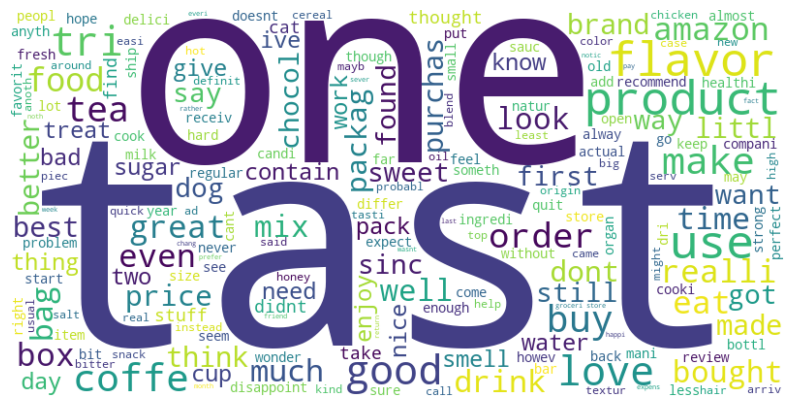

In [517]:
all_reviews = ' '.join(final_balanced_data['CleanedText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

1) Larger and bolder words in the word cloud are indicative of frequently occurring words in the text. These are likely to be significant keywords or terms in the dataset.
2) In our given dataset, Use, one, tast, good, flavor, love, product, food, amazon, order, great are few frequently occurring words in our text and are considered to be more important in giving weightage while modelling.

#### 4. Sentiment by Document Length

In [518]:
final_balanced_data['Review Length'] = final_balanced_data['CleanedText'].apply(lambda x: len(str(x).split()))
def partition(x):
    if x =='negative':
        return 0
    else:
        return 1
dummy_data=filtered_data['Score']
review_column_data=dummy_data.map(partition)
final_balanced_data['Numeric_Score']=review_column_data
final_balanced_data.head()

Id   ProductId          UserId  \
374357  374358  B00004CI84  A1HWMNSQF14MP8   
30627    30628  B00008RCMI  A3AKWA5CWSKOOH   
183742  183743  B0000TBK64  A15AW5ZZIPGH0L   
448629  448630  B000673RAC  A3D6TFYRMIV3ZL   
376099  376100  B0000DBN1Q  A2752XIGJY2YH6   

                                             ProfileName  \
374357                                 will@socialaw.com   
30627   Ilaxi S. Patel "Editor, kidsfreesouls.com & A...   
183742                                     David A. Kosa   
448629                                     Themis-Athena   
376099                 Mister Quickly "Amazon epicurean"   

        HelpfulnessNumerator  HelpfulnessDenominator     Score       Time  \
374357                     1                       2  positive 2000-12-30   
30627                      0                       0  positive 2003-11-06   
183742                     4                       4  positive 2004-06-07   
448629                    15                      16  positive 2004-11-10   
376099                     4                      13  negative 2004-12-12   

                           Summary  \
374357         A Afterlife Success   
30627   Refreshing Mouth Freshner!   
183742       A GOURMET Dressing!!!   
448629           The King of Teas.   
376099    should make bigger boxes   

                                                     Text  \
374357  Many movies, have dealt with the figure of dea...   
30627   A tennis player hubby of mine got this pack on...   
183742  This dressing is absolutely delicious.  It is ...   
448629  Unquestionably the most refined of teas, Darje...   
376099  24 teabags isn't even enough for one pot. Perh...   

                                              CleanedText  \
374357  mani movi dealt figur death dead good angel cl...   
30627   tenni player hubbi mine got pack rack opel cor...   
183742  dress absolut delici light palat fill mouth pl...   
448629  unquestion refin tea darjeel come region india...   
376099  teabag isnt even enough one pot perhap tast ru...   

                                           Tokenized_Text  Review Length  \
374357  [mani, movi, dealt, figur, death, dead, good, ...            118   
30627   [tenni, player, hubbi, mine, got, pack, rack, ...             44   
183742  [dress, absolut, delici, light, palat, fill, m...             33   
448629  [unquestion, refin, tea, darjeel, come, region...            128   
376099  [teabag, isnt, even, enough, one, pot, perhap,...             14   

        Numeric_Score  
374357              1  
30627               1  
183742              1  
448629              1  
376099              0

1) We have converted Numeric scores to 0 and 1 for further analysis and Also, we have added new column with "Review Length" that has count of words in our review text and "Numeric_Score" with 0 and 1 for negative and positive reviews respectively, which can be used for further analysis.

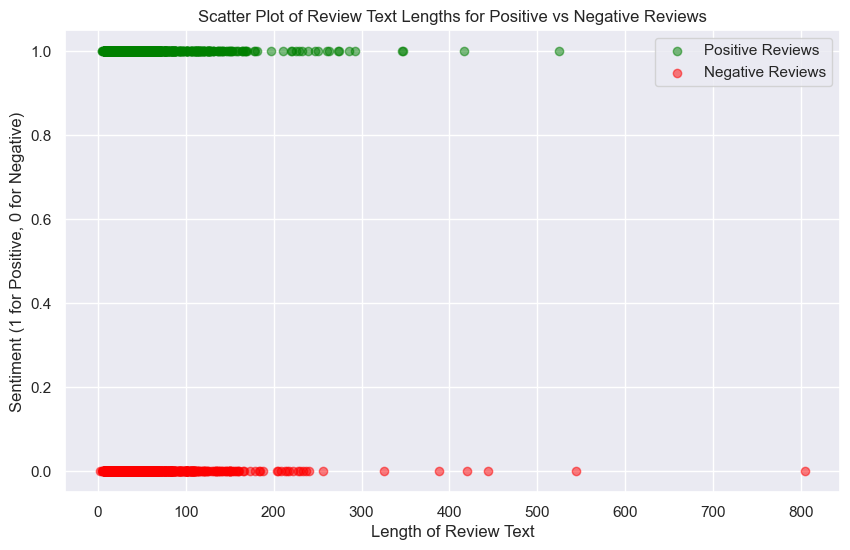

In [519]:
# Filter positive and negative reviews
positive_reviews = final_balanced_data[final_balanced_data['Numeric_Score'] == 1]
negative_reviews = final_balanced_data[final_balanced_data['Numeric_Score'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(positive_reviews['Review Length'], positive_reviews['Numeric_Score'], color='green', label='Positive Reviews', alpha=0.5)
plt.scatter(negative_reviews['Review Length'], negative_reviews['Numeric_Score'], color='red', label='Negative Reviews', alpha=0.5)
plt.xlabel('Length of Review Text')
plt.ylabel('Sentiment (1 for Positive, 0 for Negative)')
plt.title('Scatter Plot of Review Text Lengths for Positive vs Negative Reviews')
plt.legend()
plt.show()

1) From the above plot we can see that most of the review text length for positive reviews lie between 0 to 400 words, whereas for negative reviews, that length lie between 0 to 500 except for few points that crossed 500 lengths.
2) This can help us to see the average count of words that customers given for both positive and negative reviews. As they are overlapping (similar for both positive and negative), we cannot judge sentiments based on length of review text alone.

#### 5. Analysis of Helpful Votes

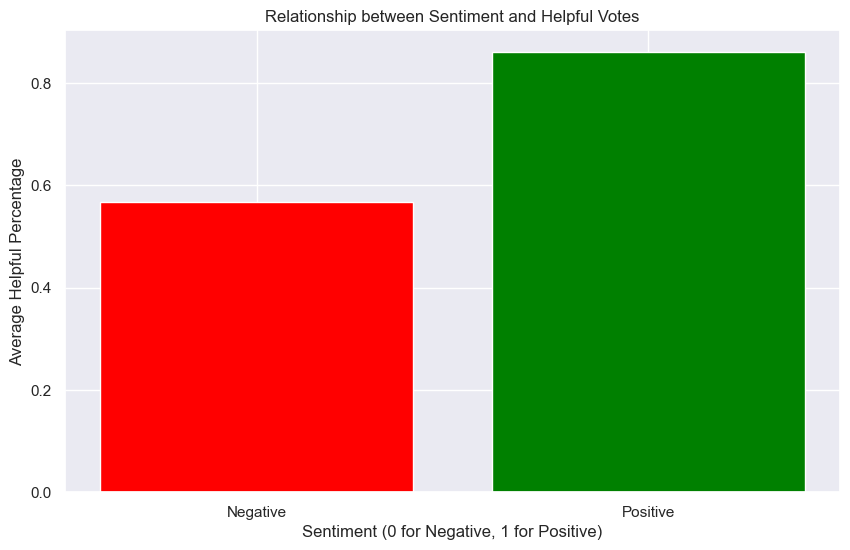

In [520]:
filtered_data = final_balanced_data[final_balanced_data['HelpfulnessDenominator'] > 0]
filtered_data['HelpfulnessPercentage'] = filtered_data['HelpfulnessNumerator'] / filtered_data['HelpfulnessDenominator']
helpful_percentage_by_sentiment = filtered_data.groupby('Numeric_Score')['HelpfulnessPercentage'].mean()
plt.figure(figsize=(10, 6))
plt.bar(helpful_percentage_by_sentiment.index, helpful_percentage_by_sentiment.values, color=['red', 'green'])
plt.xlabel('Sentiment (0 for Negative, 1 for Positive)')
plt.ylabel('Average Helpful Percentage')
plt.title('Relationship between Sentiment and Helpful Votes')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

1) From the above plot, we can see that positive reviews are found more helpful for customers compared to negative reviews. So, this shows that positive reviews can be similar in real world data and model can perform better for positive reviews compared to negative reviews as most of the customers agree with positive words that are present in our dataset.

#### 6. Length of Title vs. Length of Review Text 

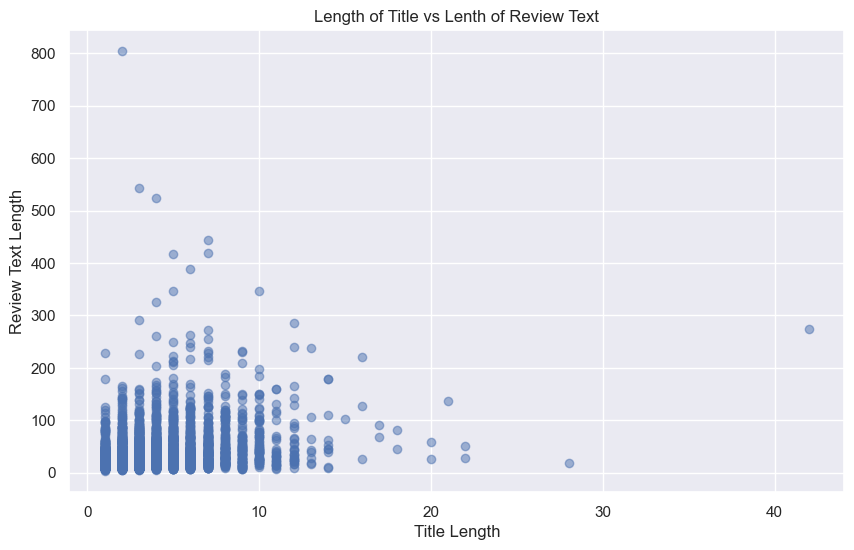

In [521]:
final_balanced_data['Title Length'] = final_balanced_data['Summary'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
plt.scatter(final_balanced_data['Title Length'], final_balanced_data['Review Length'], alpha=0.5)
plt.xlabel('Title Length')
plt.ylabel('Review Text Length')
plt.title('Length of Title vs Lenth of Review Text')
plt.show()

1) From the above plot, we can observe that most of the review title lengths fall under 0 to 20 range. So, we can tell that customers are not willing to explain their thought clearly in title itself.
2) So, considering the review text. it would be better and provide more information than title for modelling.

### Converting Review Text to Vector for modelling - Feature Engineering

#### 7. BAG OF WORDS

In [627]:
#splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(final_balanced_data['CleanedText'],final_balanced_data['Score'],test_size=0.3,random_state=42)
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.3,random_state=42)
print(x_train.shape,y_train.shape,y_test.shape,x_test.shape,x_cv.shape,y_cv.shape)

(1960,) (1960,) (1200,) (1200,) (840,) (840,)


In [523]:
type(y_test)

pandas.core.series.Series

we are splitting the data to train and text, so that test data(text) is not seen by training data while applying bag of words, tf-idf, word2vec, avg w2v techniques to convert text to vectors.

In [524]:
count_vect = CountVectorizer(min_df=10, max_features=500)
count_vect.fit(x_train)
print("some feature names ", count_vect.get_feature_names_out()[:20])
print('-'*50)

x_train_bow = count_vect.transform(x_train)
x_test_bow = count_vect.transform(x_test)
x_cv_bow = count_vect.transform(x_cv)
print("Type of count vectorizer ",type(x_train_bow))
print("Shape of BOW vectorizer ",x_train_bow.get_shape())
print("Number of unique words ", x_train_bow.get_shape()[1])
print(x_train_bow.toarray())
print(x_train_bow.shape,y_train.shape)
print(x_test_bow.shape,y_test.shape)
print(x_cv_bow.shape,y_cv.shape)

some feature names  ['abl' 'absolut' 'acid' 'actual' 'ad' 'add' 'addit' 'aftertast' 'ago'
 'almost' 'also' 'although' 'alway' 'amaz' 'amazon' 'amount' 'anoth'
 'anyon' 'anyth' 'appl']
--------------------------------------------------
Type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
Shape of BOW vectorizer  (1960, 500)
Number of unique words  500
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1960, 500) (1960,)
(1200, 500) (1200,)
(840, 500) (840,)


The "bags-of-words" form, which ignores structure and instead counts the frequency of each word, is the simplest and most natural way to accomplish this. The bags-of-words is applied using CountVectorizer, which transforms a group of text documents into a matrix of token counts. Our collection of text documents is transformed into a token count matrix by instantiating the CountVectorizer and fitting it to our training data.

### 7.1 Bi-Grams

In [446]:
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
x_train_bow_bigram = count_vect.fit_transform(x_train)
x_test_bow_bigram = count_vect.fit_transform(x_test)
x_cv_bow_bigram = count_vect.transform(x_cv)
print("some feature names ", count_vect.get_feature_names_out()[:20])
print('-'*50)
print("Type of count vectorizer ",type(x_train_bow_bigram))
print("Shape of BOW vectorizer ",x_train_bow_bigram.get_shape())
print("Number of unique words with both unigrams and bigrams ", x_train_bow_bigram.get_shape()[1])
print(x_train_bow_bigram.toarray())
print(x_train_bow_bigram.shape,y_train.shape)
print(x_test_bow_bigram.shape,y_test.shape)
print(x_cv_bow_bigram.shape,y_cv.shape)

some feature names  ['abl' 'absolut' 'acid' 'actual' 'ad' 'add' 'addict' 'addit' 'advertis'
 'aftertast' 'age' 'ago' 'agre' 'allergi' 'almond' 'almost' 'alon' 'along'
 'alreadi' 'also']
--------------------------------------------------
Type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
Shape of BOW vectorizer  (1960, 1300)
Number of unique words with both unigrams and bigrams  1300
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1960, 1300) (1960,)
(1200, 877) (1200,)
(840, 877) (840,)


bag-of-bigrams representation is much more powerful than bag-of-words.  bigram refers to a combination of two adjacent words in a text. 

### 8. Term Frequency- Inverse Document Frequency (TF-IDF):

In [628]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(x_train)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names_out()[0:20])
print('-'*50)
x_train_tf_idf = tf_idf_vect.transform(x_train)
x_test_tf_idf = tf_idf_vect.transform(x_test)
print("Type of count vectorizer ",type(x_train_tf_idf))
print("Shape of TFIDF vectorizer ",x_train_tf_idf.get_shape())
print("Number of unique words including both unigrams and bigrams ", x_train_tf_idf.get_shape()[1])
print(x_train_tf_idf.shape,y_train.shape)
print(x_test_tf_idf.shape,y_test.shape)

some sample features(unique words in the corpus) ['abl' 'abl find' 'absolut' 'absolut love' 'accept' 'accord' 'acid'
 'across' 'actual' 'ad' 'add' 'addict' 'addit' 'admit' 'adult' 'advertis'
 'advis' 'aftertast' 'age' 'ago']
--------------------------------------------------
Type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
Shape of TFIDF vectorizer  (1960, 1300)
Number of unique words including both unigrams and bigrams  1300
(1960, 1300) (1960,)
(1200, 1300) (1200,)


Tf-idf allows us to weight terms based on how important they are to a document. These extremely common phrases would cover the frequencies of less common but more interesting terms if we sent the count data straight to a classifier.

### 9. Word2Vec

In [448]:
text_data=final_balanced_data['CleanedText'].values
labels=final_balanced_data['Score'].values

In [449]:
x_train,x_test,y_train,y_test=train_test_split(text_data,labels,test_size=0.3) #random splitting

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2800,) (2800,)
(1200,) (1200,)


In [450]:
i=0
train_list_of_sent=[]
for sent in x_train:
    train_list_of_sent.append(sent.split())
train_list_of_sent[0]

['noodl',
 'actual',
 'quit',
 'good',
 'never',
 'million',
 'year',
 'order',
 'made',
 'friend',
 'sick',
 'instant',
 'eat',
 'gave',
 'noodl',
 'anoth',
 'chanc',
 'made',
 'sick',
 'tri',
 'anyth',
 'els',
 'compani',
 'either',
 'ive',
 'learn',
 'lesson']

In [451]:
train_w2v_model=Word2Vec(train_list_of_sent,min_count=5,vector_size=50,workers=4)

In [452]:
train_w2v_words = list(train_w2v_model.wv.key_to_index)
print("number of words that occured minimum 5 times ",len(train_w2v_words))
print("sample words ", train_w2v_words[0:50])

number of words that occured minimum 5 times  2454
sample words  ['tast', 'like', 'product', 'flavor', 'one', 'good', 'use', 'tri', 'tea', 'would', 'love', 'coffe', 'get', 'great', 'make', 'food', 'order', 'buy', 'time', 'even', 'realli', 'amazon', 'dont', 'much', 'eat', 'box', 'bag', 'also', 'drink', 'look', 'dog', 'well', 'price', 'find', 'chocol', 'better', 'packag', 'mix', 'first', 'think', 'ive', 'store', 'bought', 'purchas', 'brand', 'best', 'want', 'sugar', 'water', 'littl']


In [453]:
i=0
test_list_of_sent=[]
for sentance in x_test:
    test_list_of_sent.append(sentance.split())
test_list_of_sent[0]

['pasta',
 'realli',
 'good',
 'doesnt',
 'realli',
 'strong',
 'flavor',
 'doesnt',
 'conflict',
 'whatev',
 'sauc',
 'may',
 'use',
 'would',
 'high',
 'recommend']

In [454]:
test_w2v_model=Word2Vec(test_list_of_sent,min_count=5,vector_size=50, workers=4)   

In [455]:
test_w2v_words = list(test_w2v_model.wv.key_to_index)
print("number of words that occured minimum 5 times ",len(test_w2v_words))
print("sample words ", test_w2v_words[0:50])

number of words that occured minimum 5 times  1523
sample words  ['tast', 'like', 'product', 'one', 'flavor', 'tri', 'use', 'good', 'would', 'love', 'get', 'food', 'coffe', 'tea', 'buy', 'make', 'great', 'time', 'order', 'much', 'dont', 'amazon', 'even', 'box', 'bag', 'realli', 'drink', 'chocol', 'price', 'also', 'better', 'mix', 'dog', 'look', 'eat', 'give', 'well', 'littl', 'store', 'first', 'best', 'day', 'thing', 'find', 'bought', 'ive', 'water', 'think', 'brand', 'purchas']


In [456]:
# Get the dictionary mapping words to integer indices
w2v_words_dict = train_w2v_model.wv.key_to_index
# Get the list of word strings
train_w2v_words_list = train_w2v_model.wv.index_to_key
print("number of words that occured minimum 5 times ", len(train_w2v_words_list))
print("sample words ", train_w2v_words_list[0:50])

number of words that occured minimum 5 times  2454
sample words  ['tast', 'like', 'product', 'flavor', 'one', 'good', 'use', 'tri', 'tea', 'would', 'love', 'coffe', 'get', 'great', 'make', 'food', 'order', 'buy', 'time', 'even', 'realli', 'amazon', 'dont', 'much', 'eat', 'box', 'bag', 'also', 'drink', 'look', 'dog', 'well', 'price', 'find', 'chocol', 'better', 'packag', 'mix', 'first', 'think', 'ive', 'store', 'bought', 'purchas', 'brand', 'best', 'want', 'sugar', 'water', 'littl']


In [457]:
# Get the dictionary mapping words to integer indices
w2v_words_dict = test_w2v_model.wv.key_to_index
# Get the list of word strings
test_w2v_words_list = test_w2v_model.wv.index_to_key
print("number of words that occured minimum 5 times ", len(test_w2v_words_list))
print("sample words ", test_w2v_words_list[0:50])

number of words that occured minimum 5 times  1523
sample words  ['tast', 'like', 'product', 'one', 'flavor', 'tri', 'use', 'good', 'would', 'love', 'get', 'food', 'coffe', 'tea', 'buy', 'make', 'great', 'time', 'order', 'much', 'dont', 'amazon', 'even', 'box', 'bag', 'realli', 'drink', 'chocol', 'price', 'also', 'better', 'mix', 'dog', 'look', 'eat', 'give', 'well', 'littl', 'store', 'first', 'best', 'day', 'thing', 'find', 'bought', 'ive', 'water', 'think', 'brand', 'purchas']


In [458]:
word_to_check = 'awesom'

if word_to_check in train_w2v_model.wv.key_to_index:
    similar_words = train_w2v_model.wv.most_similar(word_to_check)
    print(f"Words similar to '{word_to_check}':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity}")
else:
    print(f"'{word_to_check}' is not in the vocabulary.")

Words similar to 'awesom':
call: 0.998704731464386
surpris: 0.9986342787742615
ask: 0.9986247420310974
normal: 0.9986013770103455
includ: 0.9985910058021545
cours: 0.998579204082489
arsenic: 0.9985551238059998
simpli: 0.9985391497612
bottom: 0.9985237717628479
tasti: 0.9985193014144897


1) Word2Vec captures semantic relationships between words. Words with similar meanings tend to be closer in the embedding space.
2) This can be very helpful and with less dimensions with meaningful words given equal weightage. So, model can give better results if it sees similar kind of words in unseen data

### 9.1 Average -word2vec

In [459]:
train_vectors = []; 
for sent in (train_list_of_sent): 
    sent_vec = np.zeros(50)  
    cnt_words =0; 
    for word in sent: 
        if word in train_w2v_words:
            vec = train_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    train_vectors.append(sent_vec)
train_vectors = np.array(train_vectors)
print(train_vectors.shape)
print(train_vectors[0])

(2800, 50)
[  5.93404184  -3.24353384  -0.88535838   0.65089876  -4.19971721
 -14.64821     10.00244826  21.88025835 -11.73303756  -1.70458312
  -6.87717643 -22.81355077  -2.69167313   2.10377869  -7.60343431
   7.32817684  11.44037703  -0.36237764 -15.66541141  -9.93451467
  -0.92088137  11.89164624  12.17072468  -6.41847148  -0.47996363
   2.43385866  -8.50272749  -8.26244082 -16.37920287   2.91840652
  -0.6968497   -1.1724046   -2.53535621   1.08397611 -10.81981554
  10.01801141   4.82214774  -0.71528102   5.50432717 -14.31299452
  18.65214954  -2.81736035   0.93780533   1.17795345  24.11489345
   3.18342752  -6.24628212 -14.54041663  10.12996546   5.29668621]


In [460]:
print(train_vectors[0])

[  5.93404184  -3.24353384  -0.88535838   0.65089876  -4.19971721
 -14.64821     10.00244826  21.88025835 -11.73303756  -1.70458312
  -6.87717643 -22.81355077  -2.69167313   2.10377869  -7.60343431
   7.32817684  11.44037703  -0.36237764 -15.66541141  -9.93451467
  -0.92088137  11.89164624  12.17072468  -6.41847148  -0.47996363
   2.43385866  -8.50272749  -8.26244082 -16.37920287   2.91840652
  -0.6968497   -1.1724046   -2.53535621   1.08397611 -10.81981554
  10.01801141   4.82214774  -0.71528102   5.50432717 -14.31299452
  18.65214954  -2.81736035   0.93780533   1.17795345  24.11489345
   3.18342752  -6.24628212 -14.54041663  10.12996546   5.29668621]


In [461]:
test_vectors = []; 
for sent in test_list_of_sent: 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent:
        if word in test_w2v_words:
            vec = test_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    test_vectors.append(sent_vec)
test_vectors = np.array(test_vectors)
print(test_vectors.shape)
print(test_vectors[0])

(1200, 50)
[  1.18454863   0.95778822   0.27478664  -1.76495391  -3.40208503
  -8.49925159   7.33243413  14.87801409 -10.77145225  -2.10982816
   0.39190265  -9.02079833   3.1302622    1.02637146  -4.94577265
   2.17609413   7.15586336  -3.0709979  -12.21770835  -8.04007024
   0.91142992   6.21552822  11.23800296  -1.22254021   3.69996261
   1.30533531  -7.81027293  -5.93523481  -8.74244387   4.14972032
   6.39606868   1.96350871  -3.110406     1.8553995   -6.34212789
   7.45131487   2.83133537   2.05741099   2.23381806  -6.1951229
   8.7447487   -0.87214841  -3.90390291   3.64881102  14.90147486
   2.69106305   0.33355422  -9.30725712   3.34062086  -1.48365625]


In [462]:
print(test_vectors[0])

[  1.18454863   0.95778822   0.27478664  -1.76495391  -3.40208503
  -8.49925159   7.33243413  14.87801409 -10.77145225  -2.10982816
   0.39190265  -9.02079833   3.1302622    1.02637146  -4.94577265
   2.17609413   7.15586336  -3.0709979  -12.21770835  -8.04007024
   0.91142992   6.21552822  11.23800296  -1.22254021   3.69996261
   1.30533531  -7.81027293  -5.93523481  -8.74244387   4.14972032
   6.39606868   1.96350871  -3.110406     1.8553995   -6.34212789
   7.45131487   2.83133537   2.05741099   2.23381806  -6.1951229
   8.7447487   -0.87214841  -3.90390291   3.64881102  14.90147486
   2.69106305   0.33355422  -9.30725712   3.34062086  -1.48365625]


In [463]:
x_train_avg_w2v=train_vectors
x_test_avg_w2v=test_vectors

In [464]:
print(x_train_avg_w2v.shape)
print(x_test_avg_w2v.shape)

(2800, 50)
(1200, 50)


1) word2vec produces individual word vectors for each word in a text. whereas AvgWord2vec aggregates the vectors of all words in a text to create a single vector representation for the entire text.
2) AvgWord2vec results in a single vector of the same dimensionality as the individual word vectors. But, it treats all words in a text equally, potentially losing some contextual information. we need to decide which (w2v or AvgW2v) is best based on the computational complexity and metric scores of model that is being used.

### 10. TFIDF weighted w2v

In [465]:
x_train,x_test,y_train,y_test=train_test_split(text_data,labels,test_size=0.3,random_state=5)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2800,) (2800,)
(1200,) (1200,)


In [466]:
dictionary = dict(zip(tf_idf_vect.get_feature_names_out(), list(tf_idf_vect.idf_)))

In [467]:
# tf_idf_w2v words of train data
tfidf_feat=tf_idf_vect.get_feature_names_out()
train_tfidf_w2v=[]
row = 0
for sent in train_list_of_sent:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in train_w2v_words and word in tfidf_feat:
            vec = train_w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    train_tfidf_w2v.append(sent_vec)
    row += 1
len(train_tfidf_w2v)

2800

In [468]:
print(train_tfidf_w2v[0])

[ 0.2193189  -0.12286913 -0.0287673   0.0234998  -0.15520695 -0.5456142
  0.37879232  0.81805115 -0.43854257 -0.05816096 -0.25626787 -0.85255757
 -0.10156566  0.07766213 -0.28764356  0.26933085  0.42771171 -0.01455136
 -0.58267355 -0.37189563 -0.03364591  0.4389313   0.45917041 -0.24087784
 -0.01811807  0.08715793 -0.31597778 -0.3105933  -0.61233041  0.10770838
 -0.0301296  -0.04285843 -0.09721143  0.03925752 -0.40056037  0.37004971
  0.1730947  -0.02719698  0.20781551 -0.53074509  0.70132646 -0.10481617
  0.0346356   0.04421032  0.90152008  0.12172265 -0.23479432 -0.54606552
  0.38118277  0.19992231]


In [469]:
tfidf_feat = tf_idf_vect.get_feature_names_out()
test_tfidf_w2v = []
row = 0
for sent in test_list_of_sent:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in test_w2v_words and word in tfidf_feat:
            vec = test_w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    test_tfidf_w2v.append(sent_vec)
    row += 1
len(test_tfidf_w2v)

1200

In [470]:
print(test_tfidf_w2v[0])

[ 0.07636132  0.05557311  0.01661089 -0.10960345 -0.21642325 -0.53702073
  0.46195261  0.93606989 -0.67762739 -0.12978162  0.02485733 -0.5671478
  0.19652249  0.06689334 -0.3140945   0.13738453  0.450323   -0.19491042
 -0.77104723 -0.50511036  0.05959876  0.39151781  0.70642542 -0.07805704
  0.23418179  0.07988016 -0.49038104 -0.37687116 -0.54990461  0.26104322
  0.40273613  0.12651397 -0.19385257  0.11736939 -0.39869733  0.46792289
  0.17823706  0.12991046  0.14108413 -0.39239974  0.55354353 -0.05531882
 -0.24422987  0.22866222  0.93528427  0.16871984  0.02034373 -0.58229421
  0.21286876 -0.09203466]


In [471]:
x_train_tfidf_w2v=np.array(train_tfidf_w2v)
x_test_tfidf_w2v=np.array(test_tfidf_w2v)
print(x_train_tfidf_w2v.shape)
print(x_test_tfidf_w2v.shape)

(2800, 50)
(1200, 50)


1) TFIDF-Word2Vec Combines the principles of TF-IDF weighting and averaging Word2Vec vectors to create text representations.
2) It incorporates TF-IDF scores to give more weight to important words while creating the average vector. Provides a weighted average representation that focuses more on important words in the context of the entire corpus.
3) TF-IDF-Word2Vec is particularly useful in scenarios where the importance of words varies within the corpus.
4) Similar to word2vec and Avg-w2v, we need to decide which (w2v or AvgW2v or TF-idf w2v) is best based on the computational complexity and metric scores of model that is being used.

# Project Phase-2

### Applying K-NN on Bow Features

In [568]:
count_vect = CountVectorizer(min_df=10, max_features=500)
count_vect.fit(x_train)
with open('BOW.pkl', 'wb') as file:
    pickle.dump(count_vect, file)
print("some feature names ", count_vect.get_feature_names_out()[:20])
print('-'*50)

x_train_bow = count_vect.transform(x_train)
x_test_bow = count_vect.transform(x_test)
x_cv_bow = count_vect.transform(x_cv)
print("Type of count vectorizer ",type(x_train_bow))
print("Shape of BOW vectorizer ",x_train_bow.get_shape())
print("Number of unique words ", x_train_bow.get_shape()[1])
print(x_train_bow.toarray())
print(x_train_bow.shape,y_train.shape)
print(x_test_bow.shape,y_test.shape)
print(x_cv_bow.shape,y_cv.shape)

some feature names  ['abl' 'absolut' 'acid' 'actual' 'ad' 'add' 'addit' 'aftertast' 'ago'
 'almost' 'also' 'although' 'alway' 'amaz' 'amazon' 'amount' 'anoth'
 'anyon' 'anyth' 'appl']
--------------------------------------------------
Type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
Shape of BOW vectorizer  (1960, 500)
Number of unique words  500
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1960, 500) (1960,)
(1200, 500) (1200,)
(840, 500) (840,)


In [529]:
def Grid_search(x_train,y_train,algorithm):
    cv=KFold(n_splits=5)
    myList = list(range(0,50))
    K=list(filter(lambda x: x % 2 != 0, myList))
    neigh=KNeighborsClassifier(algorithm=algorithm)
    parameters = {'n_neighbors':list(filter(lambda x: x % 2 != 0, myList))}
    clf = GridSearchCV(neigh, parameters, cv=cv, scoring='roc_auc',return_train_score=True,verbose=1)
    clf.fit(x_train, y_train)
    
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_n_neighbors'])

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_k = clf.best_params_['n_neighbors']
    
    sns.set()
    plt.plot(K, train_auc, label='Train AUC')
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(K, cv_auc, label='CV AUC')
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    
    print("Best cross-validation score: {:.3f}".format(clf.best_score_))
    print('The best k from gridsearch :',best_k)
    return  best_k

##### Hyper parameter tuning

### ROC_AUC plot

Fitting 5 folds for each of 25 candidates, totalling 125 fits


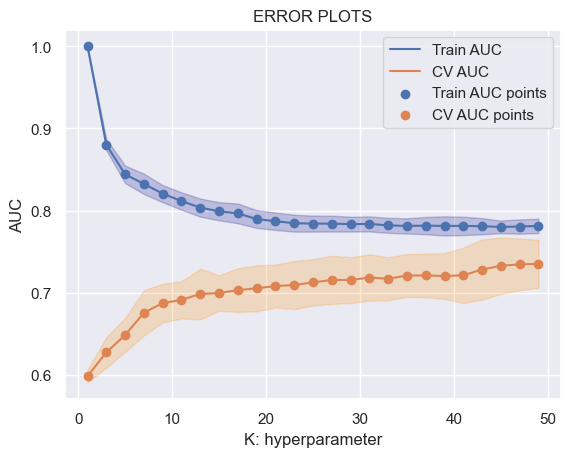

Best cross-validation score: 0.735
The best k from gridsearch : 49


In [530]:
best_k=Grid_search(x_train_bow,y_train,'brute')

In [531]:
from tqdm import tqdm
def cross_validation(x_train,y_train,x_cv,y_cv,algorithm):
    train_auc = []
    cv_auc = []
    myList = list(range(0,50))
    K=list(filter(lambda x: x % 2 != 0, myList))
    for i in tqdm(K):
        neigh = KNeighborsClassifier(n_neighbors=i,algorithm=algorithm)
        neigh.fit(x_train, y_train)

   # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
        y_train_pred =  neigh.predict_proba(x_train)[:,1]
        y_cv_pred =  neigh.predict_proba(x_cv)[:,1]
    
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

    sns.set()    
    plt.plot(K, train_auc, label='Train AUC')
    plt.plot(K, cv_auc, label='CV AUC')

    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

100%|███████████████████████████████████████████| 25/25 [00:03<00:00,  7.90it/s]


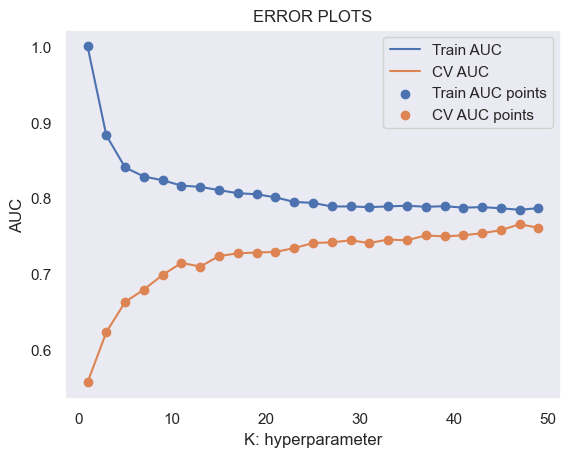

In [532]:
cross_validation(x_train_bow,y_train,x_cv_bow,y_cv,'brute')

In [533]:
print(best_k)

49


In [596]:
# Convert labels to binary format
lb = LabelBinarizer()
y_train_binary = lb.fit_transform(y_train)
y_test_binary = lb.transform(y_test)

In [535]:
from sklearn.metrics import roc_curve, auc
def test_data(x_train,y_train,x_test,y_test,algorithm):
    neigh = KNeighborsClassifier(n_neighbors=best_k,algorithm=algorithm, n_jobs=-1)
    neigh.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

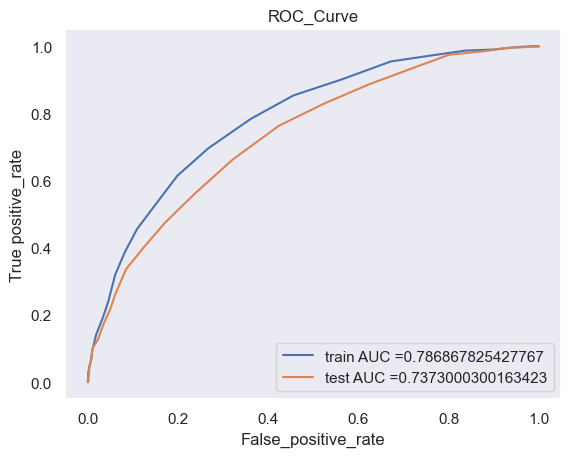

The AUC_score of test_data is : 0.7373000300163423


In [536]:
test_data(x_train_bow,y_train_binary,x_test_bow,y_test_binary,'brute')

In [537]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def metric(x_train,y_train,x_test,y_test,algorithm):
    knn=KNeighborsClassifier(n_neighbors=best_k,algorithm=algorithm)
    knn.fit(x_train,y_train)
    with open('KNN_BOW.pkl', 'wb') as file:
        pickle.dump(knn, file)
    predict=knn.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.68      0.68      0.68       614
    positive       0.66      0.66      0.66       586

    accuracy                           0.67      1200
   macro avg       0.67      0.67      0.67      1200
weighted avg       0.67      0.67      0.67      1200



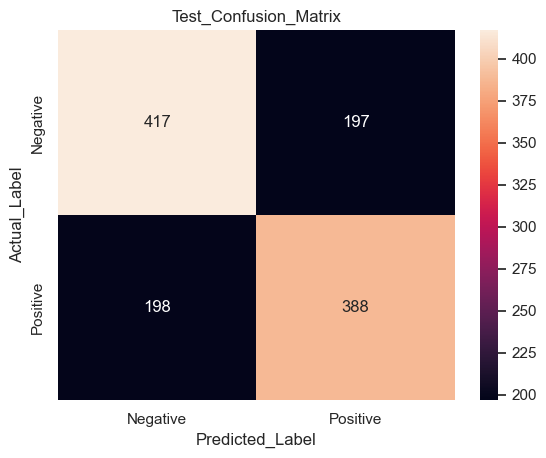

In [538]:
metric(x_train_bow,y_train,x_test_bow,y_test,'brute')

In [539]:
#Just to check the pickle loaded model
with open('KNN_BOW.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_bow)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.68      0.68      0.68       614
    positive       0.66      0.66      0.66       586

    accuracy                           0.67      1200
   macro avg       0.67      0.67      0.67      1200
weighted avg       0.67      0.67      0.67      1200



#### Applying KNN brute force on TFIDF Features

In [549]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(x_train)
with open('TF_IDF.pkl', 'wb') as file:
    pickle.dump(tf_idf_vect, file)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names_out()[0:20])
print('-'*50)
x_train_tf_idf = tf_idf_vect.transform(x_train)
x_test_tf_idf = tf_idf_vect.transform(x_test)
print("Type of count vectorizer ",type(x_train_tf_idf))
print("Shape of TFIDF vectorizer ",x_train_tf_idf.get_shape())
print("Number of unique words including both unigrams and bigrams ", x_train_tf_idf.get_shape()[1])
print(x_train_tf_idf.shape,y_train.shape)
print(x_test_tf_idf.shape,y_test.shape)

some sample features(unique words in the corpus) ['abl' 'abl find' 'absolut' 'absolut love' 'accept' 'accord' 'acid'
 'across' 'actual' 'ad' 'add' 'addict' 'addit' 'admit' 'adult' 'advertis'
 'advis' 'aftertast' 'age' 'ago']
--------------------------------------------------
Type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
Shape of TFIDF vectorizer  (1960, 1300)
Number of unique words including both unigrams and bigrams  1300
(1960, 1300) (1960,)
(1200, 1300) (1200,)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


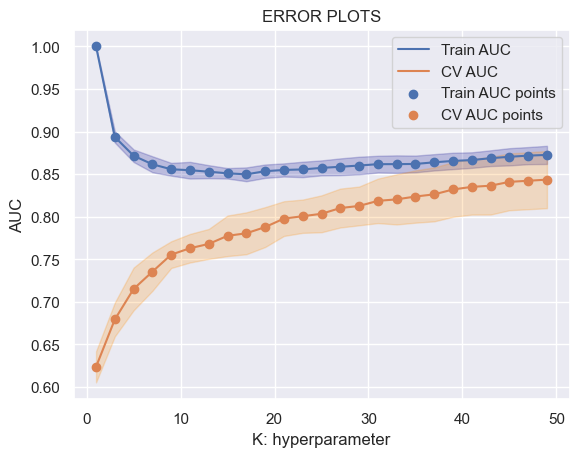

Best cross-validation score: 0.844
The best k from gridsearch : 49


In [542]:
best_k=Grid_search(x_train_tf_idf,y_train,'brute')

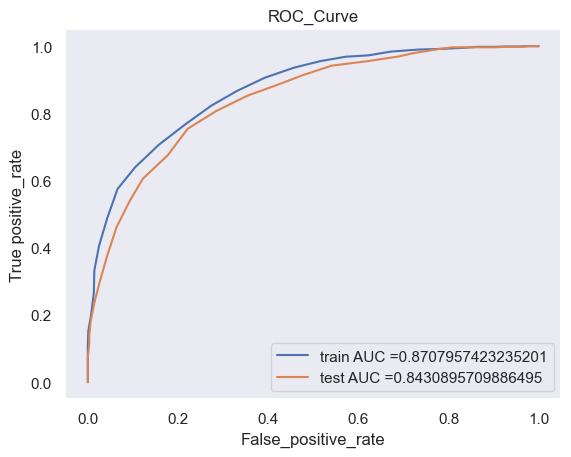

The AUC_score of test_data is : 0.8430895709886495


In [543]:
test_data(x_train_tf_idf,y_train_binary,x_test_tf_idf,y_test_binary,'brute')

In [544]:
def metric(x_train,y_train,x_test,y_test,algorithm):
    knn=KNeighborsClassifier(n_neighbors=best_k,algorithm=algorithm)
    knn.fit(x_train,y_train)
    with open('KNN_TF_IDF.pkl', 'wb') as file:
        pickle.dump(knn, file)
    predict=knn.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.80      0.71      0.75       614
    positive       0.73      0.81      0.77       586

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200



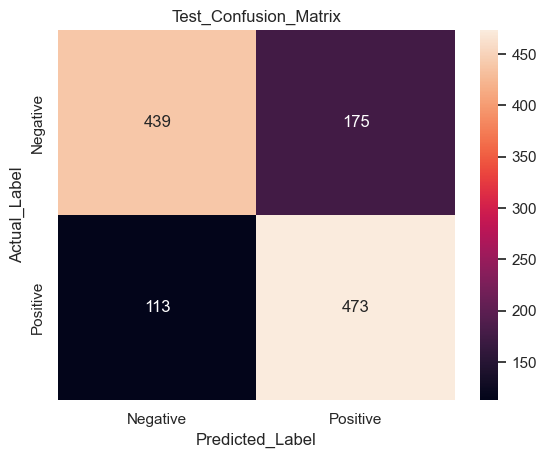

In [545]:
metric(x_train_tf_idf,y_train,x_test_tf_idf,y_test,'brute')

In [546]:
#Just to check the pickle loaded model
with open('KNN_TF_IDF.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tf_idf)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.80      0.71      0.75       614
    positive       0.73      0.81      0.77       586

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200



#### Applying K-NN on Avg-Word2Vec

In [231]:
print(x_train_avg_w2v.shape)
print(x_test_avg_w2v.shape)
print(y_train.shape)
print(y_test.shape)

(2800, 50)
(1200, 50)
(2800,)
(1200,)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


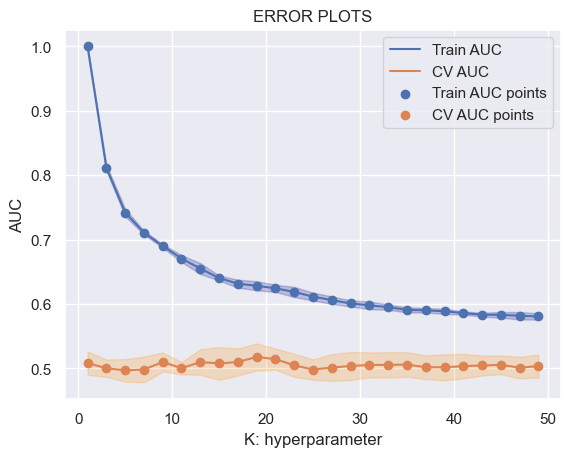

Best cross-validation score: 0.518
The best k from gridsearch : 19


In [232]:
best_k=Grid_search(x_train_avg_w2v,y_train,'brute')

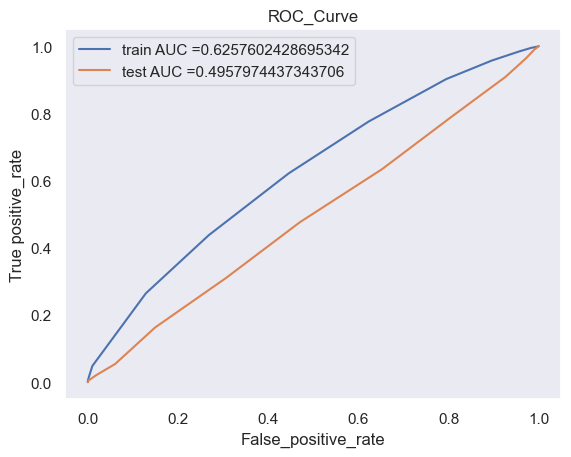

The AUC_score of test_data is : 0.4957974437343706


In [233]:
test_data(x_train_avg_w2v,y_train_binary,x_test_avg_w2v,y_test_binary,'brute')

In [234]:
def metric(x_train,y_train,x_test,y_test,algorithm):
    knn=KNeighborsClassifier(n_neighbors=best_k,algorithm=algorithm)
    knn.fit(x_train,y_train)
    with open('KNN_Avg_W2V.pkl', 'wb') as file:
        pickle.dump(knn, file)
    predict=knn.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.51      0.53      0.52       610
    positive       0.49      0.48      0.49       590

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.50      0.50      0.50      1200



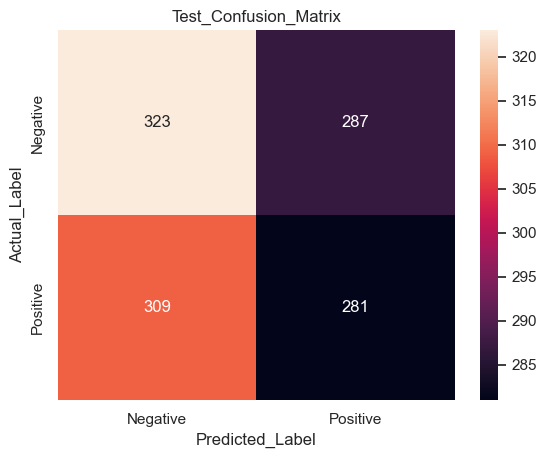

In [235]:
metric(x_train_avg_w2v,y_train,x_test_avg_w2v,y_test,'brute')

In [236]:
#Just to check the pickle loaded model
with open('KNN_Avg_W2V.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_avg_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.51      0.53      0.52       610
    positive       0.49      0.48      0.49       590

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.50      0.50      0.50      1200



#### Applying k-NN on TF-IDF_W2V

In [237]:
print(x_train_tfidf_w2v.shape)
print(x_test_tfidf_w2v.shape)
print(y_train.shape)
print(y_test.shape)

(2800, 50)
(1200, 50)
(2800,)
(1200,)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


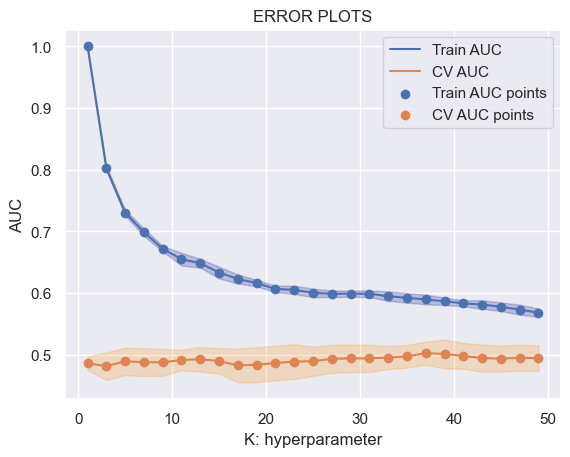

Best cross-validation score: 0.503
The best k from gridsearch : 37


In [238]:
best_k=Grid_search(x_train_tfidf_w2v,y_train,'brute')

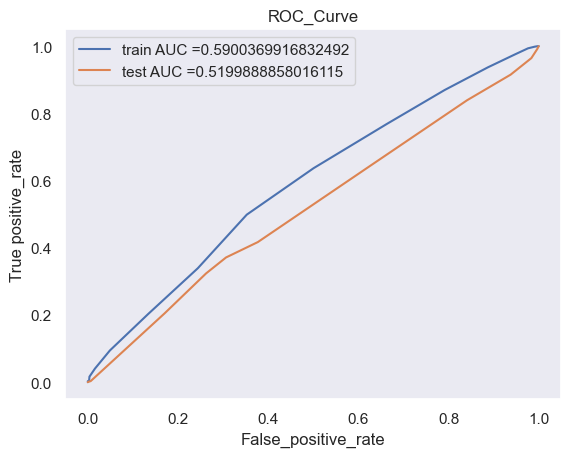

The AUC_score of test_data is : 0.5199888858016115


In [239]:
test_data(x_train_tfidf_w2v,y_train_binary,x_test_tfidf_w2v,y_test_binary,'brute')

In [240]:
def metric(x_train,y_train,x_test,y_test,algorithm):
    knn=KNeighborsClassifier(n_neighbors=best_k,algorithm=algorithm)
    knn.fit(x_train,y_train)
    with open('KNN_tfidf_W2V.pkl', 'wb') as file:
        pickle.dump(knn, file)
    predict=knn.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.52      0.62      0.57       610
    positive       0.52      0.42      0.46       590

    accuracy                           0.52      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.52      0.52      0.52      1200



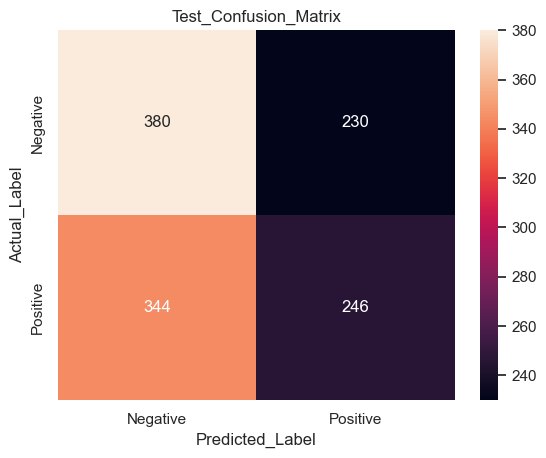

In [241]:
metric(x_train_tfidf_w2v,y_train,x_test_tfidf_w2v,y_test,'brute')

In [242]:
#Just to check the pickle loaded model
with open('KNN_tfidf_W2V.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tfidf_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.52      0.62      0.57       610
    positive       0.52      0.42      0.46       590

    accuracy                           0.52      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.52      0.52      0.52      1200



In [88]:
!pip install prettytable
from prettytable import PrettyTable
    
table = PrettyTable()
table.field_names = ["Vectorizer", "Model", "Hyper_Parameter(K)", "AUC_Score"]
table.add_row(["Bow", 'K_NN_Brute_Force', 49,78.7 ])
table.add_row(["TFIDF", 'K_NN_Brute_Force', 49, 84.1])
table.add_row(["Avg_Word2vec", 'K_NN_Brute_Force', 47, 49.9,])
table.add_row(["TFIDF_Word2vec", 'K_NN_Brute_Force',1 ,49.14 ])
print(table)

+----------------+------------------+--------------------+-----------+
|   Vectorizer   |      Model       | Hyper_Parameter(K) | AUC_Score |
+----------------+------------------+--------------------+-----------+
|      Bow       | K_NN_Brute_Force |         49         |    78.7   |
|     TFIDF      | K_NN_Brute_Force |         49         |    84.1   |
|  Avg_Word2vec  | K_NN_Brute_Force |         47         |    49.9   |
| TFIDF_Word2vec | K_NN_Brute_Force |         1          |   49.14   |
+----------------+------------------+--------------------+-----------+


### Observation:

1) From the above table we observed that TF-IDF having the highest AUC score on test data
2) TF-IDF model also works reasonabally good on test data .

# Applying Naive_bayes on BOW

In [552]:
print(x_train_bow.shape,y_train.shape)
print(x_test_bow.shape,y_test.shape)
print(x_cv_bow.shape,y_cv.shape)

(1960, 500) (1960,)
(1200, 500) (1200,)
(840, 500) (840,)


In [553]:
from sklearn.naive_bayes import MultinomialNB
import math
def Grid_search(X_train,Y_train):
    cv=KFold(n_splits=5)
    alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
    model=MultinomialNB()
    parameters = {'alpha':alpha_values}
    clf = GridSearchCV(model,parameters, cv=cv, scoring='roc_auc',return_train_score=True,verbose=1)
    clf.fit(X_train, Y_train)
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_alpha'])
    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_alpha= clf.best_params_['alpha']
    sns.set()
    alpha_values=[math.log(x) for x in alpha_values]
    plt.plot(alpha_values, train_auc, label='Train AUC')
    plt.gca().fill_between(alpha_values,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    plt.plot(alpha_values, cv_auc, label='CV AUC')
    plt.gca().fill_between(alpha_values,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(alpha_values, train_auc, label='Train AUC points')
    plt.scatter(alpha_values, cv_auc, label='CV AUC points')
    plt.legend()
    plt.xlabel("alpha_values: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    
    print("Best cross-validation score: {:.3f}".format(clf.best_score_))
    print('The best alpha from gridsearch :',best_alpha)
    return  best_alpha

Fitting 5 folds for each of 11 candidates, totalling 55 fits


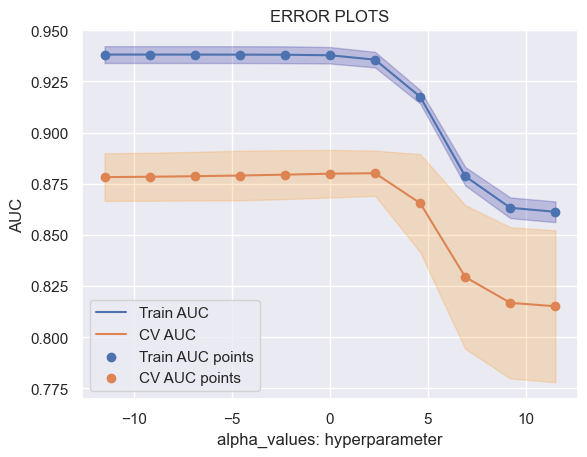

Best cross-validation score: 0.880
The best alpha from gridsearch : 10


In [554]:
best_alpha=Grid_search(x_train_bow,y_train)

In [555]:
best_alpha

10

In [556]:
def test_data(x_train,y_train,x_test,y_test):
    model=MultinomialNB(alpha=best_alpha)
    model.fit(x_train, y_train)
    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

In [557]:
def metric(x_train,y_train,x_test,y_test):
    model=MultinomialNB(alpha=best_alpha)
    model.fit(x_train, y_train)
    with open('NaiveBayes_BOW.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

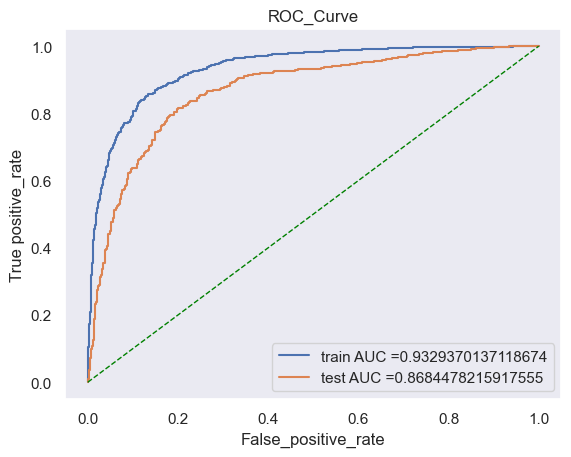

The AUC_score of test_data is : 0.8684478215917555


In [558]:
test_data(x_train_bow,y_train_binary,x_test_bow,y_test_binary)

              precision    recall  f1-score   support

    negative       0.83      0.78      0.80       614
    positive       0.78      0.83      0.80       586

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



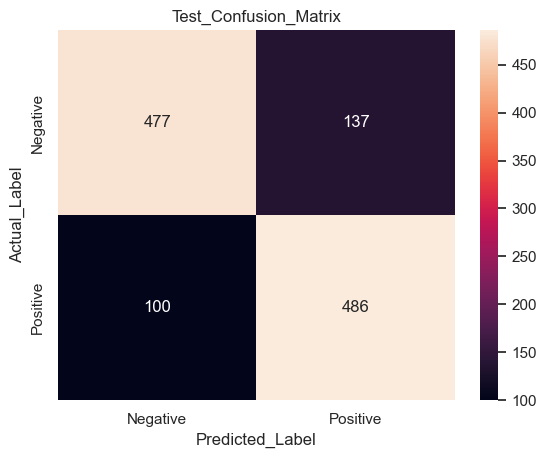

In [559]:
metric(x_train_bow,y_train,x_test_bow,y_test)

In [560]:
#Just to check the pickle loaded model
with open('NaiveBayes_BOW.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_bow)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.83      0.78      0.80       614
    positive       0.78      0.83      0.80       586

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



### Applying Naive_Bayes on tf-idf feature

In [561]:
print(x_train_tf_idf.shape,y_train.shape)
print(x_test_tf_idf.shape,y_test.shape)

(1960, 1300) (1960,)
(1200, 1300) (1200,)


Fitting 5 folds for each of 11 candidates, totalling 55 fits


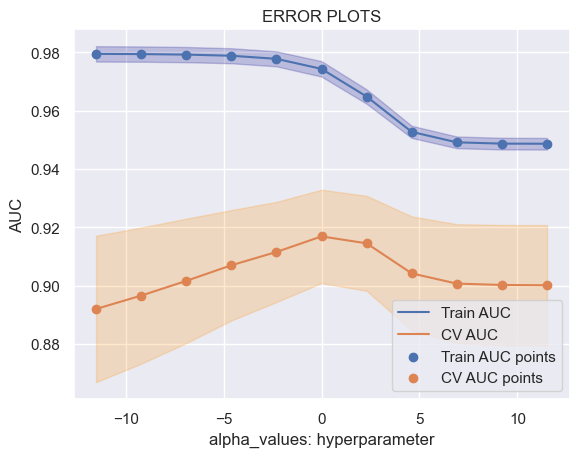

Best cross-validation score: 0.917
The best alpha from gridsearch : 1


In [562]:
best_alpha=Grid_search(x_train_tf_idf,y_train)

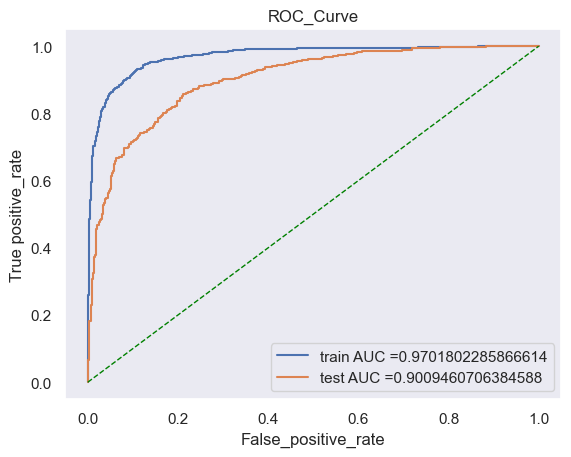

The AUC_score of test_data is : 0.9009460706384588


In [563]:
test_data(x_train_tf_idf,y_train_binary,x_test_tf_idf,y_test_binary)

In [564]:
def metric(x_train,y_train,x_test,y_test):
    model=MultinomialNB(alpha=best_alpha)
    model.fit(x_train, y_train)
    with open('NaiveBayes_tfidf.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.83      0.80      0.82       614
    positive       0.80      0.83      0.81       586

    accuracy                           0.81      1200
   macro avg       0.82      0.82      0.81      1200
weighted avg       0.82      0.81      0.82      1200



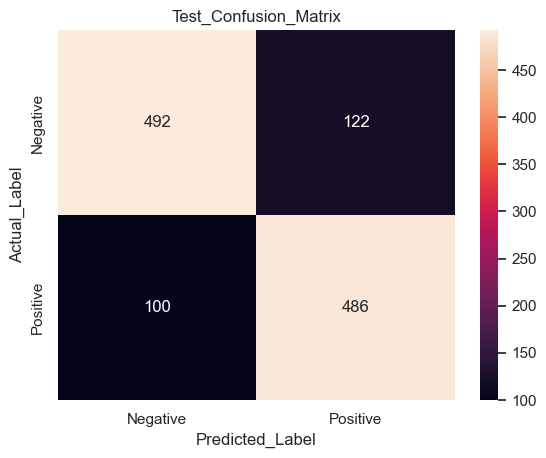

In [565]:
metric(x_train_tf_idf,y_train,x_test_tf_idf,y_test)

In [566]:
#Just to check the pickle loaded model
with open('NaiveBayes_tfidf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tf_idf)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.83      0.80      0.82       614
    positive       0.80      0.83      0.81       586

    accuracy                           0.81      1200
   macro avg       0.82      0.82      0.81      1200
weighted avg       0.82      0.81      0.82      1200



In [101]:
from prettytable import PrettyTable
    
table = PrettyTable()
table.field_names = ["Vectorizer", "Feature engineering", " Hyper Parameter (alpha)", "AUC_Score"]
table.add_row(["Bow", 'Featurized', 10,88.9 ])
table.add_row(["TFIDF", 'Featurized', 1, 92.92])
print(table)

+------------+---------------------+--------------------------+-----------+
| Vectorizer | Feature engineering |  Hyper Parameter (alpha) | AUC_Score |
+------------+---------------------+--------------------------+-----------+
|    Bow     |      Featurized     |            10            |    88.9   |
|   TFIDF    |      Featurized     |            1             |   92.92   |
+------------+---------------------+--------------------------+-----------+


### Observation:

1) Compare to Bag of words features represntation , tf-idf features are got the highest 92.92% AUC score on Test data.
2) Both are having the 1 as the best alpha by Hyper parameter tuning.
3) Both models have resonabally works well for Amazon_food_reviews classification.

# Apply Logistic regression on BOW

In [569]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
x_train_bow = sc.fit_transform(x_train_bow)
x_test_bow = sc.transform(x_test_bow)

In [570]:
from sklearn.linear_model import LogisticRegression
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
L1_model=LogisticRegression(penalty='l1',C=C,solver='liblinear',max_iter=500)

In [571]:
def Grid_search(model,X_train,Y_train):
    
    parameters = {'C':C}
    cv=KFold(n_splits=5)
    clf = GridSearchCV(model,parameters, cv=cv, scoring='roc_auc',return_train_score=True)
    clf.fit(X_train, Y_train)
    
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_C'])

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_C= clf.best_params_['C'] #c=1/lamda
    
    sns.set()
    C_values=[math.log(x) for x in C]
    plt.plot(C, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(C,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(C, cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(C,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(C, train_auc, label='Train AUC points')
    plt.scatter(C, cv_auc, label='CV AUC points')
    plt.legend()
    plt.xlabel("C = 1/λ: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    
    print("Best cross-validation score: {:.3f}".format(clf.best_score_))
    print('The best C from gridsearch :',best_C)
    return  best_C

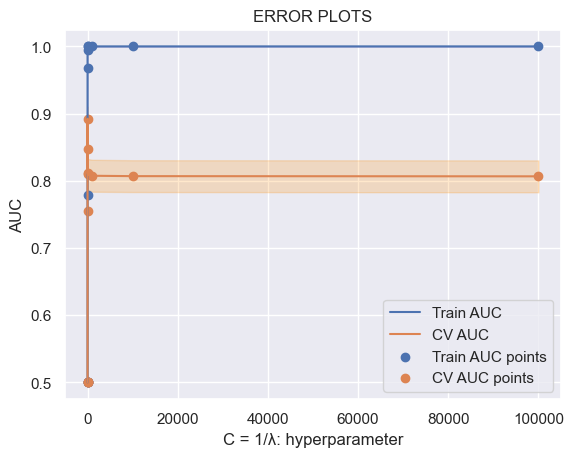

Best cross-validation score: 0.892
The best C from gridsearch : 0.1


In [572]:
import warnings
L1_best_c=Grid_search(L1_model,x_train_bow,y_train)

In [573]:
def test_data(model,x_train,y_train,x_test,y_test):
   
    model.fit(x_train, y_train)
    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

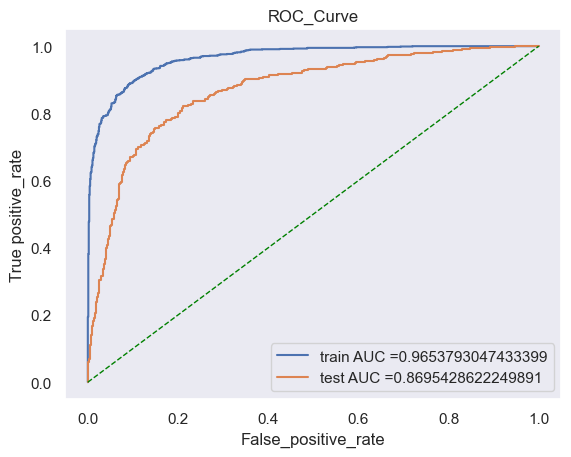

The AUC_score of test_data is : 0.8695428622249891


In [574]:
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
test_data(L1_model,x_train_bow,y_train_binary,x_test_bow,y_test_binary)

In [575]:
def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    with open('Logistic_BOW.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.82      0.78      0.80       614
    positive       0.78      0.83      0.80       586

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



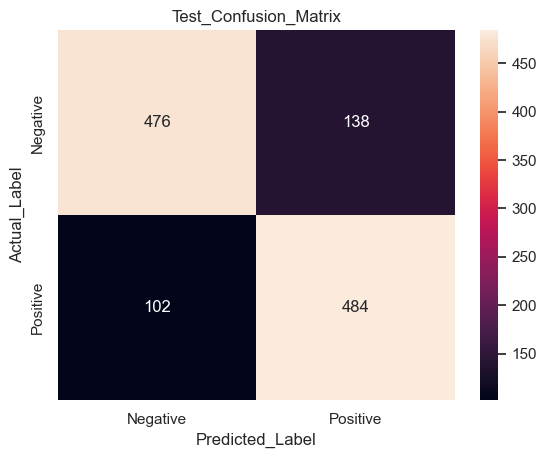

In [576]:
metric(L1_model,x_train_bow,y_train,x_test_bow,y_test)

In [577]:
#Just to check the pickle loaded model
with open('Logistic_BOW.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_bow)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.82      0.78      0.80       614
    positive       0.78      0.83      0.80       586

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



# Apply Logistic regression on TF-IDF

In [580]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
x_train_tf_idf = sc.fit_transform(x_train_tf_idf)
x_test_tf_idf = sc.transform(x_test_tf_idf)

In [581]:
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
L1_model=LogisticRegression(penalty='l1',C=C,solver='liblinear',max_iter=500)

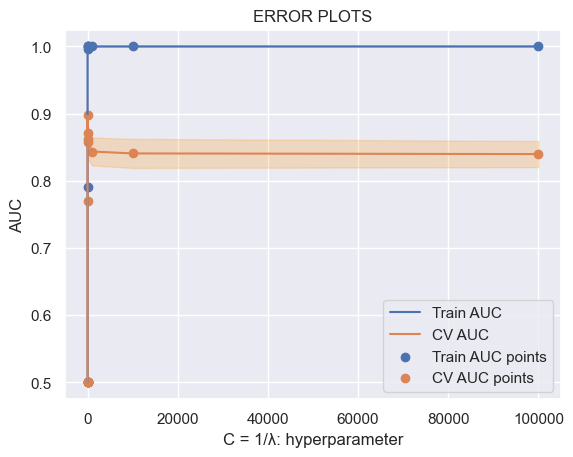

Best cross-validation score: 0.897
The best C from gridsearch : 0.1


In [582]:
L1_best_c=Grid_search(L1_model,x_train_tf_idf,y_train)

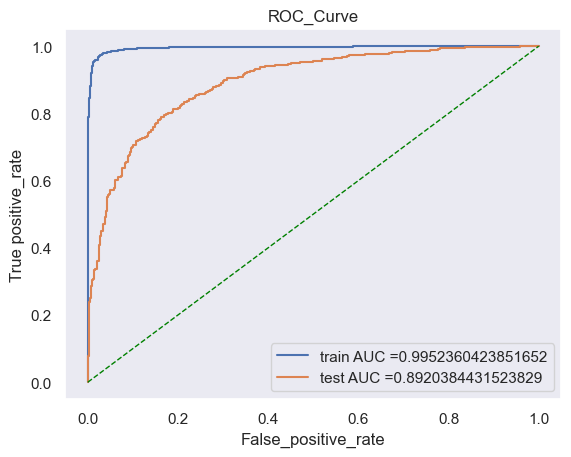

The AUC_score of test_data is : 0.8920384431523829


In [583]:
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
test_data(L1_model,x_train_tf_idf,y_train_binary,x_test_tf_idf,y_test_binary)

In [584]:
def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    with open('Logistic_TFIDF.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.83      0.79      0.81       614
    positive       0.79      0.82      0.81       586

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



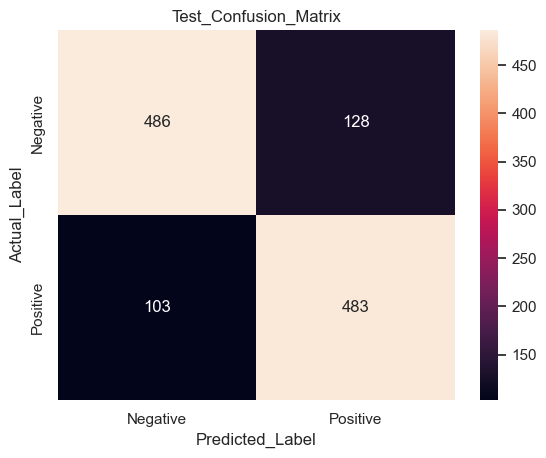

In [585]:
metric(L1_model,x_train_tf_idf,y_train,x_test_tf_idf,y_test)

In [586]:
#Just to check the pickle loaded model
with open('Logistic_TFIDF.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tf_idf)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.83      0.79      0.81       614
    positive       0.79      0.82      0.81       586

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



# Apply Logistic regression on AVG-W2V

In [275]:
x_test_avg_w2v= np.array(x_train_avg_w2v)
x_test_avg_w2v= np.array(x_test_avg_w2v)
print(x_train_avg_w2v.shape)
print(x_test_avg_w2v.shape)

(2800, 50)
(2800, 50)


In [276]:
y_train_binary.shape
y_test_binary.shape

(1200, 1)

In [277]:
C = [0.01,0.1,1,10]
L1_model=LogisticRegression(penalty='l1',C=C,solver='liblinear',max_iter=500)

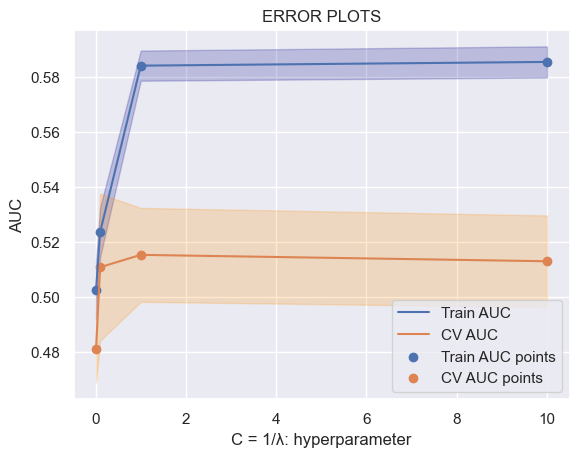

Best cross-validation score: 0.515
The best C from gridsearch : 1


In [278]:
L1_best_c=Grid_search(L1_model,x_train_avg_w2v,y_train)

In [279]:
x_train_avg_w2v=train_vectors
x_test_avg_w2v=test_vectors

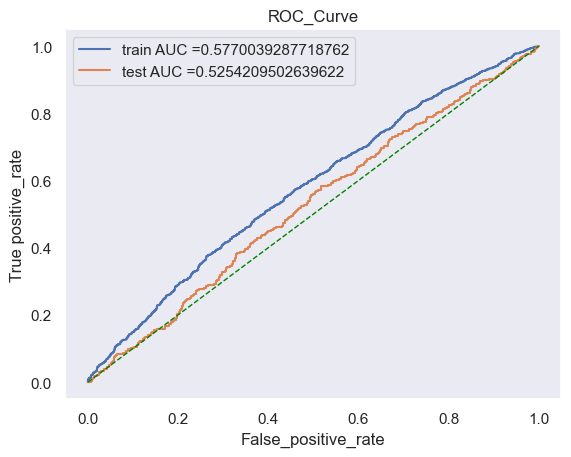

The AUC_score of test_data is : 0.5254209502639622


In [280]:
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
test_data(L1_model,x_train_avg_w2v,y_train_binary,x_test_avg_w2v,y_test_binary)

In [281]:
def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    with open('Logistic_avg_w2v.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.51      1.00      0.67       610
    positive       0.00      0.00      0.00       590

    accuracy                           0.51      1200
   macro avg       0.25      0.50      0.34      1200
weighted avg       0.26      0.51      0.34      1200



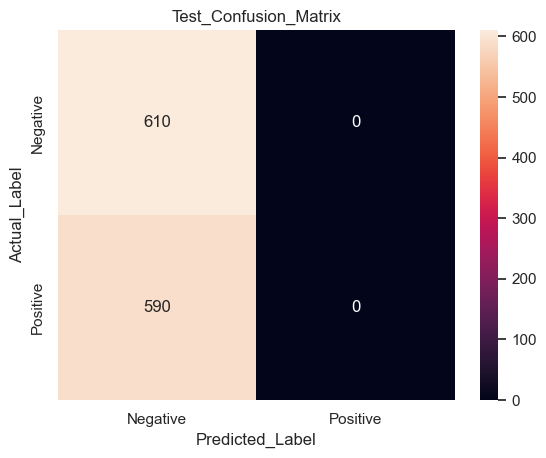

In [282]:
metric(L1_model,x_train_avg_w2v,y_train,x_test_avg_w2v,y_test)

In [283]:
#Just to check the pickle loaded model
with open('Logistic_avg_w2v.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_avg_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.51      1.00      0.67       610
    positive       0.00      0.00      0.00       590

    accuracy                           0.51      1200
   macro avg       0.25      0.50      0.34      1200
weighted avg       0.26      0.51      0.34      1200



# Apply Logistic regression on TFIDF_W2V

In [284]:
x_train_tfidf_w2v= np.array(x_train_tfidf_w2v)
x_test_tfidf_w2v= np.array(x_test_tfidf_w2v)
print(x_train_tfidf_w2v.shape)
print(x_test_tfidf_w2v.shape)

(2800, 50)
(1200, 50)


In [285]:
C = [0.01,0.1,1,10]
L1_model=LogisticRegression(penalty='l1',C=C,solver='liblinear',max_iter=500)

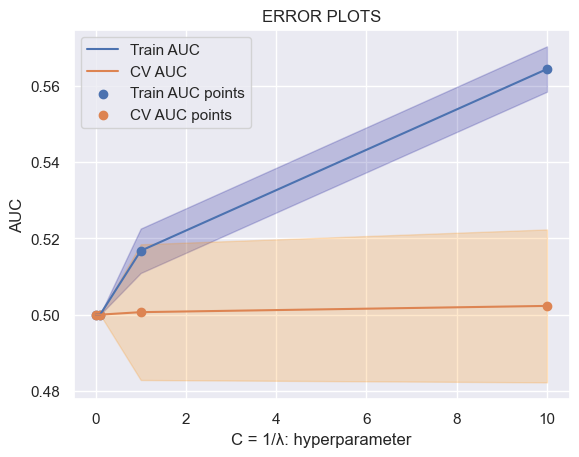

Best cross-validation score: 0.502
The best C from gridsearch : 10


In [286]:
L1_best_c=Grid_search(L1_model,x_train_tfidf_w2v,y_train)

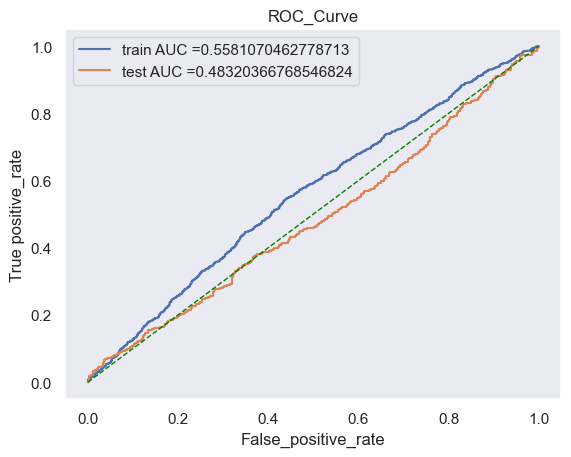

The AUC_score of test_data is : 0.48320366768546824


In [287]:
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
test_data(L1_model,x_train_tfidf_w2v,y_train_binary,x_test_tfidf_w2v,y_test_binary)

In [288]:
def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    with open('Logistic_tfidf_w2v.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       610
    positive       0.49      1.00      0.66       590

    accuracy                           0.49      1200
   macro avg       0.25      0.50      0.33      1200
weighted avg       0.24      0.49      0.32      1200



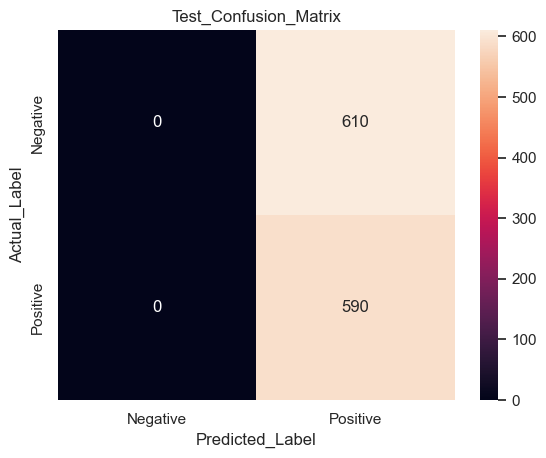

In [289]:
metric(L1_model,x_train_tfidf_w2v,y_train,x_test_tfidf_w2v,y_test)

In [292]:
#Just to check the pickle loaded model
with open('Logistic_tfidf_w2v.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_avg_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       610
    positive       0.49      1.00      0.66       590

    accuracy                           0.49      1200
   macro avg       0.25      0.50      0.33      1200
weighted avg       0.24      0.49      0.32      1200



In [293]:
table = PrettyTable()
table.field_names = ["Vectorizer","Regularization", "Hyperameter(C=1/lamda)", "AUC"]
table.add_row(["BOW","L1",0.1,89.26])
table.add_row(["TFIDF","L1",0.1,91.09])
table.add_row(["AvgW2v","L1",10,88.6])
table.add_row(["TFIDF_AvgW2v","L1",10,49.3])
print(table)

+--------------+----------------+------------------------+-------+
|  Vectorizer  | Regularization | Hyperameter(C=1/lamda) |  AUC  |
+--------------+----------------+------------------------+-------+
|     BOW      |       L1       |          0.1           | 89.26 |
|    TFIDF     |       L1       |          0.1           | 91.09 |
|    AvgW2v    |       L1       |           10           |  88.6 |
| TFIDF_AvgW2v |       L1       |           10           |  49.3 |
+--------------+----------------+------------------------+-------+


# Observation

1) From the above table we conclude that TFIDF featurization with L1 Regularization have the Highest AUC score of 91.09 %

# Apply Support Vector Machines on BOW

In [608]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
x_train_bow = sc.fit_transform(x_train_bow)
x_test_bow = sc.transform(x_test_bow)
x_cv_bow=sc.transform(x_cv_bow)

In [295]:
def Hyper_parameter(X_train,X_cv,Y_train,Y_cv):
    import warnings
    max_roc_auc=-1
    cv_scores = []
    train_scores = []
    penalties = ['l1', 'l2']
    C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
    for i in C:
        for p in penalties:
            model= SGDClassifier(alpha=i, penalty=p, loss='hinge', random_state=42)
            model.fit(X_train,Y_train)
            clf = CalibratedClassifierCV(model, method="sigmoid")
            clf.fit(X_train, Y_train)
            y_score=clf.predict_proba(X_cv)[:,1]
            scores = roc_auc_score(Y_cv, y_score)
            cv_scores.append(scores)
            y_score=clf.predict_proba(X_train)[:,1]
            scores = roc_auc_score(Y_train, y_score)
            train_scores.append(scores)
            s=['0.00001+L1', '0.00001+L2', '0.0001+L1', '0.0001+L2', '0.001+L1', '0.001+L2', '0.01+L1', '0.01+L2',
             '0.1+L1', '0.1+L2', '1+L1', '1+L2', '10+L1', '10+L2', '100+L1', '100+L2','1000+L1','1000+L2','10000+L1','10000+L2']
    optimal_alpha= s[cv_scores.index(max(cv_scores))]
    alpha=[math.log(x) for x in C]#converting values of alpha into logarithm
    fig = plt.figure(figsize=(20,5))
    ax = plt.subplot()
    ax.plot(s, train_scores, label='AUC train')
    ax.plot(s, cv_scores, label='AUC CV')
    plt.title('AUC vs hyperparameter')
    plt.xlabel('alpha')
    plt.ylabel('AUC')
    plt.xticks()
    ax.legend()
    plt.show()
    print('best Cross validation score: {:.3f}'.format(max(cv_scores)))
    print('optimal alpha and penalty for which auc is maximum : ',optimal_alpha)

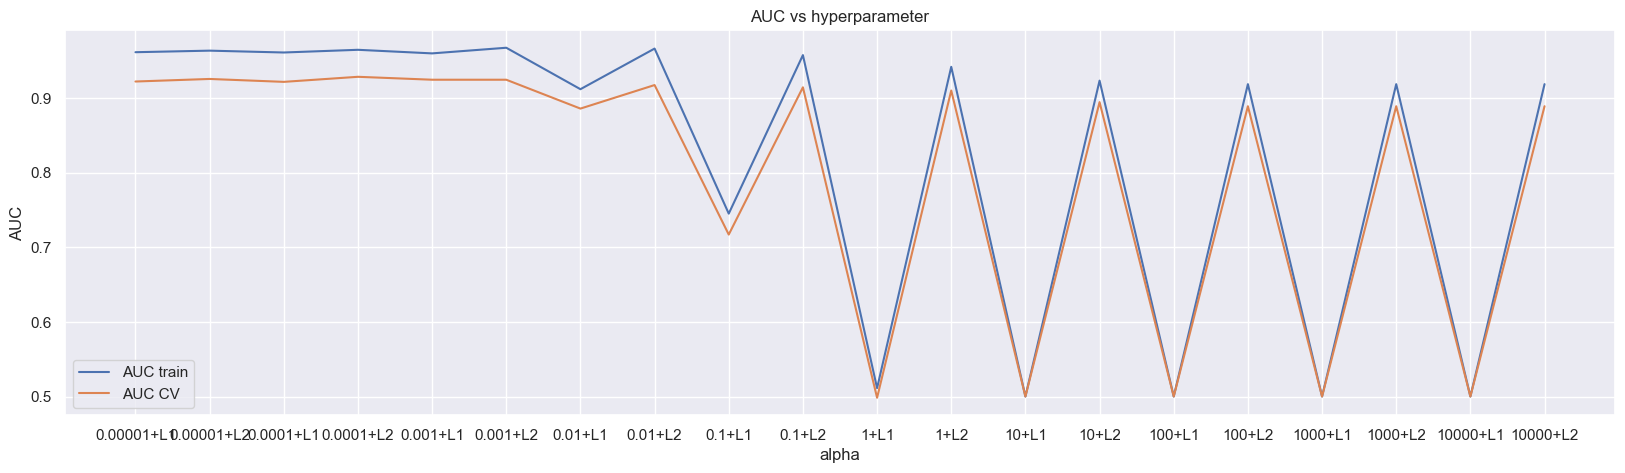

best Cross validation score: 0.929
optimal alpha and penalty for which auc is maximum :  0.0001+L2


In [296]:
import warnings as w
w.filterwarnings("ignore")
Hyper_parameter(x_train_bow,x_cv_bow,y_train,y_cv)

In [297]:
best_alpha=0.1
best_penalty='l2'

In [609]:

def test_data(x_train,y_train,x_test,y_test):
    model = SGDClassifier(loss='hinge', penalty=best_penalty, alpha=best_alpha, n_jobs=-1)
    clf = CalibratedClassifierCV(base_estimator=model, cv=None)
   
    clf.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

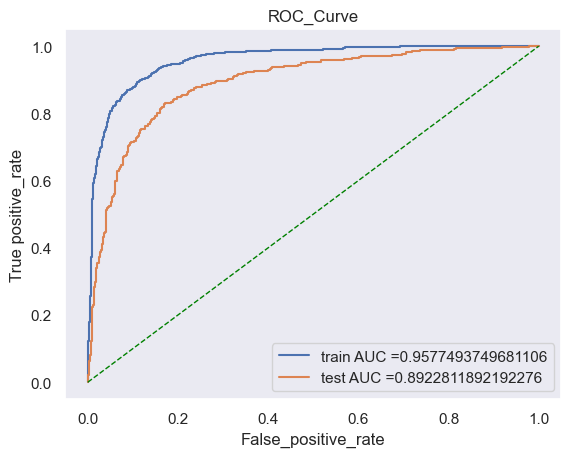

The AUC_score of test_data is : 0.8922811892192276


In [299]:
test_data(x_train_bow,y_train_binary,x_test_bow,y_test_binary)

In [300]:
def metric(x_train,y_train,x_test,y_test):
    model = SGDClassifier(loss='hinge', penalty=best_penalty, alpha=best_alpha, n_jobs=-1)
    clf = CalibratedClassifierCV(base_estimator=model, cv=None)
    clf.fit(x_train, y_train)
    with open('SVM_BOW.pkl', 'wb') as file:
        pickle.dump(clf, file)
    predict=clf.predict(x_test)
    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    report=classification_report(y_test,predict)
    print(report)
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.84      0.82      0.83       610
    positive       0.81      0.84      0.83       590

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



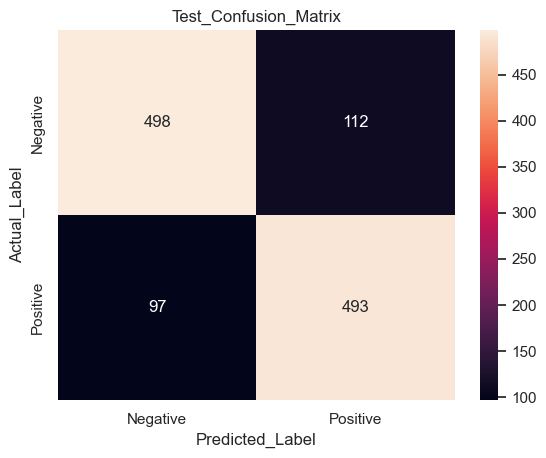

In [301]:
metric(x_train_bow,y_train,x_test_bow,y_test)

In [302]:
#Just to check the pickle loaded model
with open('SVM_BOW.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_bow)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.84      0.82      0.83       610
    positive       0.81      0.84      0.83       590

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



# Apply Support Vector Machines on TF-IDF

In [597]:
sc = StandardScaler(with_mean=False)
x_train_tfidf = sc.fit_transform(x_train_tf_idf)
x_test_tfidf = sc.transform(x_test_tf_idf)
print(y_train.shape)
print(y_test.shape)

(1960,)
(1200,)


In [610]:
def Hyper_parameter(x_train,x_test,y_train,y_test):
    import warnings
    max_roc_auc=-1
    cv_scores = []
    train_scores = []
    penalties = ['l1', 'l2']
    C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
    for i in C:
        for p in penalties:
            model= SGDClassifier(alpha=i, penalty=p, loss='hinge', random_state=42)
            model.fit(x_train,y_train)
            clf = CalibratedClassifierCV(model, method="sigmoid")
            clf.fit(x_train, y_train)
            y_score=clf.predict_proba(x_test)[:,1]
            scores = roc_auc_score(y_test, y_score)
            cv_scores.append(scores)
            y_score=clf.predict_proba(x_train)[:,1]
            scores = roc_auc_score(y_train, y_score)
            train_scores.append(scores)
            s=['0.00001+L1', '0.00001+L2', '0.0001+L1', '0.0001+L2', '0.001+L1', '0.001+L2', '0.01+L1', '0.01+L2',
             '0.1+L1', '0.1+L2', '1+L1', '1+L2', '10+L1', '10+L2', '100+L1', '100+L2','1000+L1','1000+L2','10000+L1','10000+L2']
    optimal_alpha= s[cv_scores.index(max(cv_scores))]
    alpha=[math.log(x) for x in C]#converting values of alpha into logarithm
    fig = plt.figure(figsize=(20,5))
    ax = plt.subplot()
    ax.plot(s, train_scores, label='AUC train')
    ax.plot(s, cv_scores, label='AUC CV')
    plt.title('AUC vs hyperparameter')
    plt.xlabel('alpha')
    plt.ylabel('AUC')
    plt.xticks()
    ax.legend()
    plt.show()
    print('best Cross validation score: {:.3f}'.format(max(cv_scores)))
    print('optimal alpha and penalty for which auc is maximum : ',optimal_alpha)

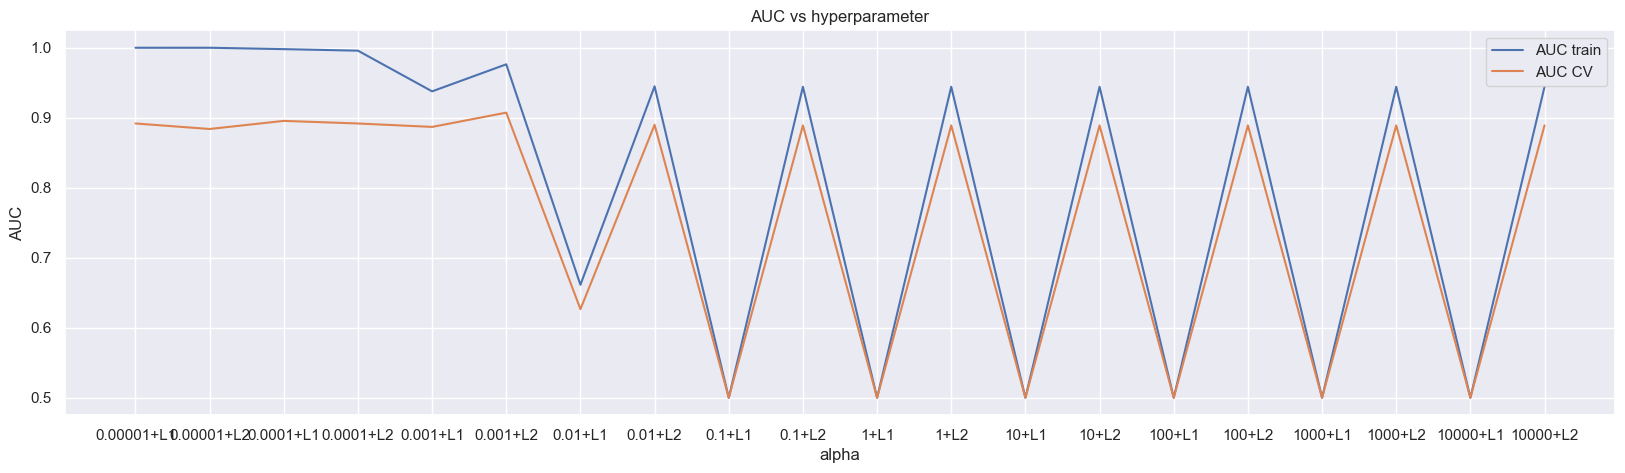

best Cross validation score: 0.907
optimal alpha and penalty for which auc is maximum :  0.001+L2


In [611]:
Hyper_parameter(x_train_tf_idf,x_test_tf_idf,y_train,y_test)

In [612]:
best_alpha=1
best_penalty='l2'

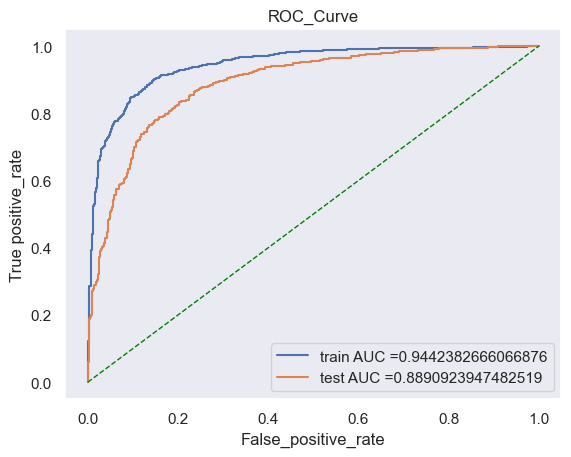

The AUC_score of test_data is : 0.8890923947482519


In [613]:
test_data(x_train_tf_idf,y_train_binary,x_test_tf_idf,y_test_binary)

In [614]:
def metric(x_train,y_train,x_test,y_test):
    model = SGDClassifier(loss='hinge', penalty=best_penalty, alpha=best_alpha, n_jobs=-1)
    clf = CalibratedClassifierCV(base_estimator=model, cv=None)
    clf.fit(x_train, y_train)
    with open('SVM_TFIDF.pkl', 'wb') as file:
        pickle.dump(clf, file)
    predict=clf.predict(x_test)
    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    report=classification_report(y_test,predict)
    print(report)
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.82      0.81      0.82       614
    positive       0.80      0.82      0.81       586

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



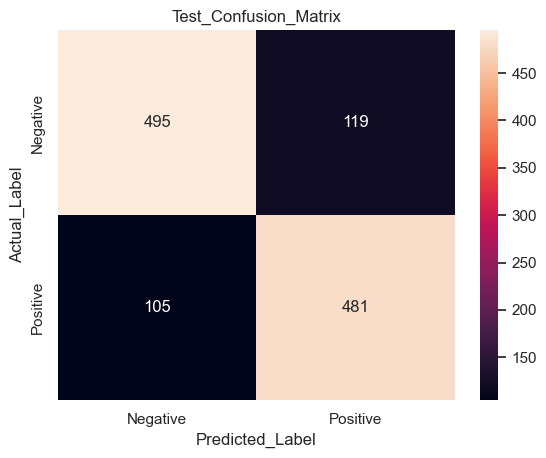

In [615]:
metric(x_train_tf_idf,y_train,x_test_tf_idf,y_test)

In [616]:
#Just to check the pickle loaded model
with open('SVM_TFIDF.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tf_idf)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.82      0.81      0.82       614
    positive       0.80      0.82      0.81       586

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



# Apply Support Vector Machines on Avg_W2V

In [311]:
x_train_avg_w2v= np.array(x_train_avg_w2v)
x_test_avg_w2v= np.array(x_test_avg_w2v)
print(x_train_avg_w2v.shape)
print(x_test_avg_w2v.shape)
print(y_train.shape)
print(y_test.shape)

(2800, 50)
(1200, 50)
(2800,)
(1200,)


In [312]:
def Hyper_parameter(x_train,x_test,y_train,y_test):
    import warnings
    max_roc_auc=-1
    cv_scores = []
    train_scores = []
    penalties = ['l1', 'l2']
    C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
    for i in C:
        for p in penalties:
            model= SGDClassifier(alpha=i, penalty=p, loss='hinge', random_state=42)
            model.fit(x_train,y_train)
            clf = CalibratedClassifierCV(model, method="sigmoid")
            clf.fit(x_train, y_train)
            y_score=clf.predict_proba(x_test)[:,1]
            scores = roc_auc_score(y_test, y_score)
            cv_scores.append(scores)
            y_score=clf.predict_proba(x_train)[:,1]
            scores = roc_auc_score(y_train, y_score)
            train_scores.append(scores)
            s=['0.00001+L1', '0.00001+L2', '0.0001+L1', '0.0001+L2', '0.001+L1', '0.001+L2', '0.01+L1', '0.01+L2',
             '0.1+L1', '0.1+L2', '1+L1', '1+L2', '10+L1', '10+L2', '100+L1', '100+L2','1000+L1','1000+L2','10000+L1','10000+L2']
    optimal_alpha= s[cv_scores.index(max(cv_scores))]
    alpha=[math.log(x) for x in C]#converting values of alpha into logarithm
    fig = plt.figure(figsize=(20,5))
    ax = plt.subplot()
    ax.plot(s, train_scores, label='AUC train')
    ax.plot(s, cv_scores, label='AUC CV')
    plt.title('AUC vs hyperparameter')
    plt.xlabel('alpha')
    plt.ylabel('AUC')
    plt.xticks()
    ax.legend()
    plt.show()
    print('best Cross validation score: {:.3f}'.format(max(cv_scores)))
    print('optimal alpha and penalty for which auc is maximum : ',optimal_alpha)

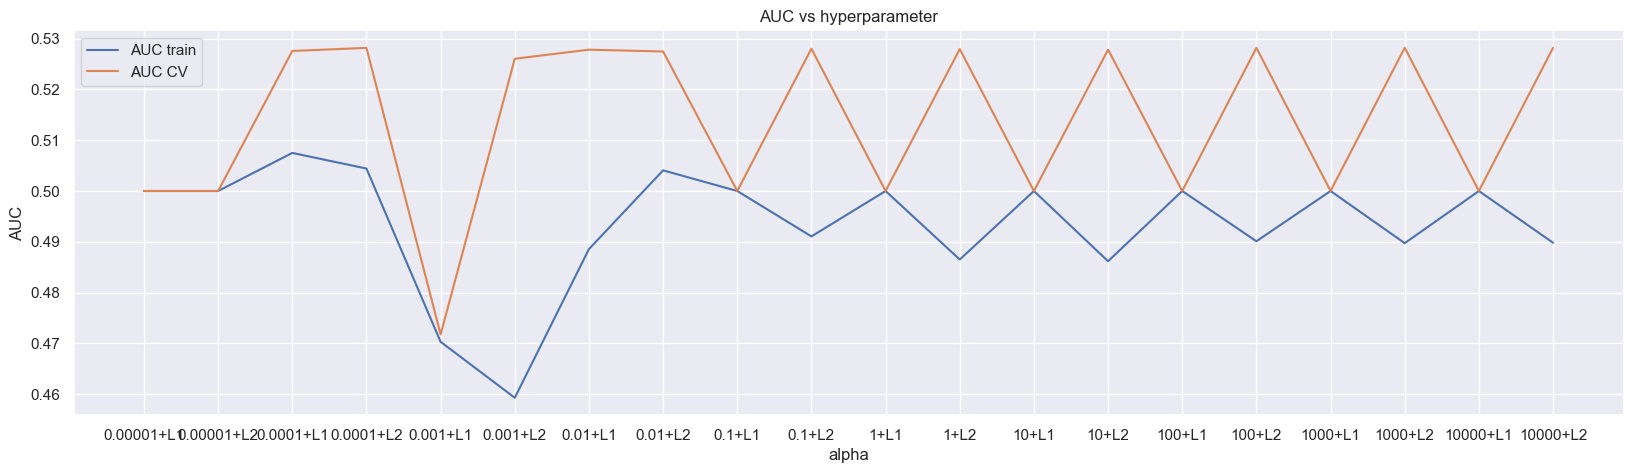

best Cross validation score: 0.528
optimal alpha and penalty for which auc is maximum :  1000+L2


In [313]:
Hyper_parameter(x_train_avg_w2v,x_test_avg_w2v,y_train,y_test)

In [314]:
best_alpha=0.5
best_penalty='l2'

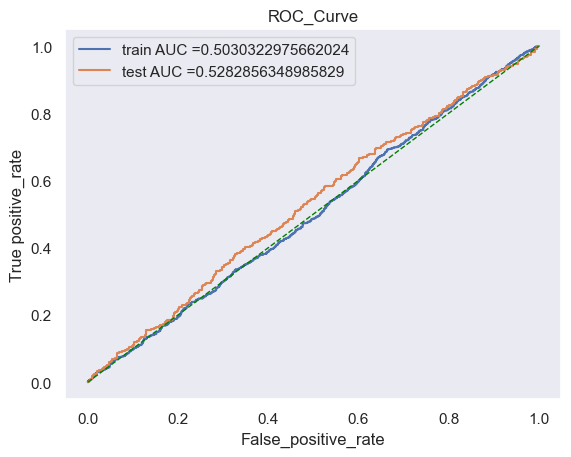

The AUC_score of test_data is : 0.5282856348985829


In [315]:
test_data(x_train_avg_w2v,y_train_binary,x_test_avg_w2v,y_test_binary)

In [316]:
def metric(x_train,y_train,x_test,y_test):
    model = SGDClassifier(loss='hinge', penalty=best_penalty, alpha=best_alpha, n_jobs=-1)
    clf = CalibratedClassifierCV(base_estimator=model, cv=None)
    clf.fit(x_train, y_train)
    with open('SVM_Avgw2v.pkl', 'wb') as file:
        pickle.dump(clf, file)
    predict=clf.predict(x_test)
    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    report=classification_report(y_test,predict)
    print(report)
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.55      0.32      0.41       610
    positive       0.51      0.73      0.60       590

    accuracy                           0.52      1200
   macro avg       0.53      0.52      0.50      1200
weighted avg       0.53      0.52      0.50      1200



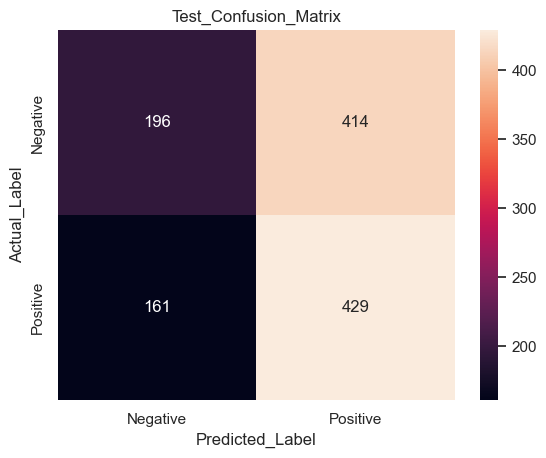

In [317]:
metric(x_train_avg_w2v,y_train,x_test_avg_w2v,y_test)

In [318]:
#Just to check the pickle loaded model
with open('SVM_Avgw2v.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_avg_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.55      0.32      0.41       610
    positive       0.51      0.73      0.60       590

    accuracy                           0.52      1200
   macro avg       0.53      0.52      0.50      1200
weighted avg       0.53      0.52      0.50      1200



# Apply Support Vector Machines on Tf-idf_W2V

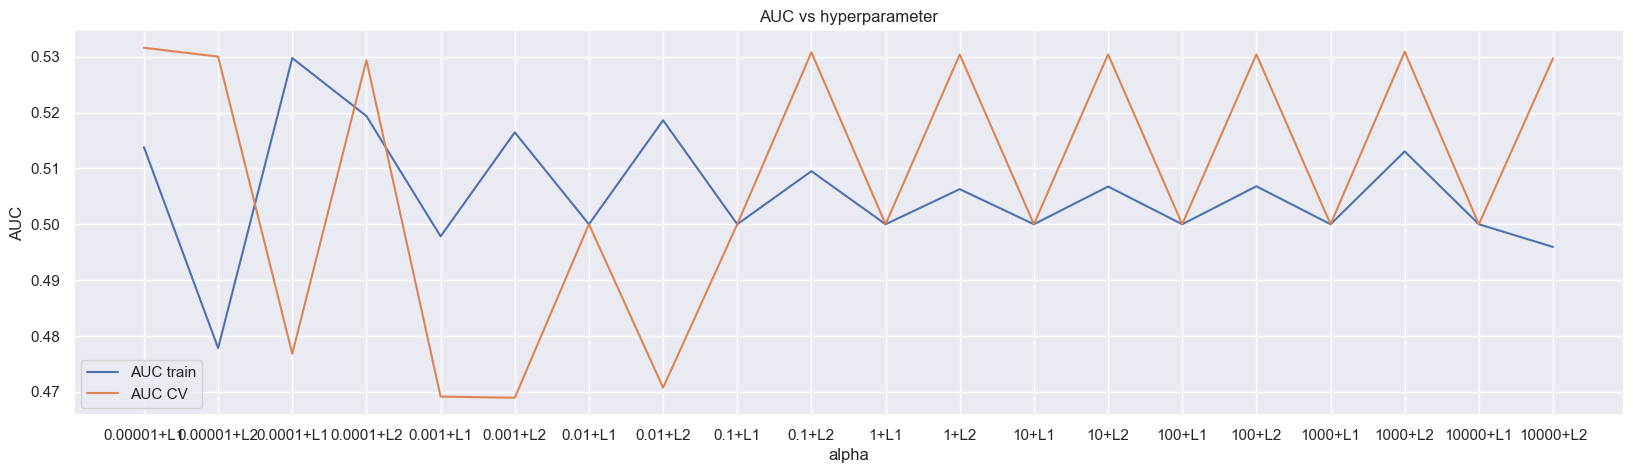

best Cross validation score: 0.532
optimal alpha and penalty for which auc is maximum :  0.00001+L1


In [319]:
Hyper_parameter(x_train_tfidf_w2v,x_test_tfidf_w2v,y_train,y_test)

In [320]:
best_alpha=0.5
best_penalty='l1'

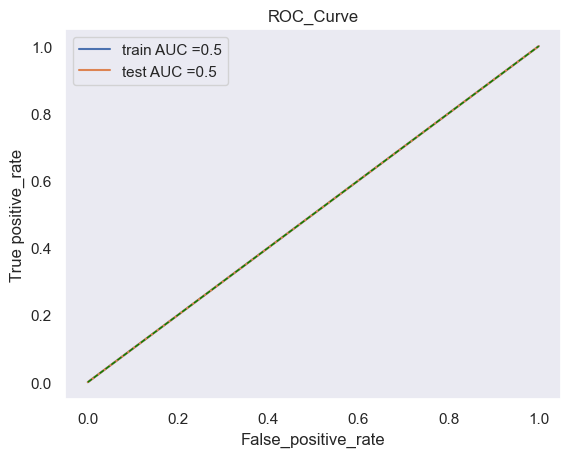

The AUC_score of test_data is : 0.5


In [321]:
test_data(x_train_tfidf_w2v,y_train_binary,x_test_tfidf_w2v,y_test_binary)

In [322]:
def metric(x_train,y_train,x_test,y_test):
    model = SGDClassifier(loss='hinge', penalty=best_penalty, alpha=best_alpha, n_jobs=-1)
    clf = CalibratedClassifierCV(base_estimator=model, cv=None)
    clf.fit(x_train, y_train)
    with open('SVM_tfidfw2v.pkl', 'wb') as file:
        pickle.dump(clf, file)
    predict=clf.predict(x_test)
    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    report=classification_report(y_test,predict)
    print(report)
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       610
    positive       0.49      1.00      0.66       590

    accuracy                           0.49      1200
   macro avg       0.25      0.50      0.33      1200
weighted avg       0.24      0.49      0.32      1200



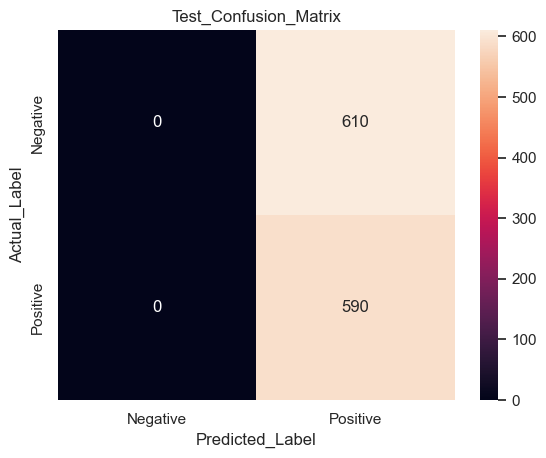

In [323]:
metric(x_train_tfidf_w2v,y_train,x_test_tfidf_w2v,y_test)

In [324]:
#Just to check the pickle loaded model
with open('SVM_tfidfw2v.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tfidf_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       610
    positive       0.49      1.00      0.66       590

    accuracy                           0.49      1200
   macro avg       0.25      0.50      0.33      1200
weighted avg       0.24      0.49      0.32      1200



In [325]:
table = PrettyTable()
table.field_names = ["Vectorizer","Regularization", "Hyperameter(C)", "AUC_Score"]
table.add_row(["BOW","L2",0.1,92.9])
table.add_row(["TFIDF","L2",1,92.03])
table.add_row(["AvgW2v","L2",0.5,51.1])
table.add_row(["TFIDF_AvgW2v","L1",0.5,50.0])
print(table)

+--------------+----------------+----------------+-----------+
|  Vectorizer  | Regularization | Hyperameter(C) | AUC_Score |
+--------------+----------------+----------------+-----------+
|     BOW      |       L2       |      0.1       |    92.9   |
|    TFIDF     |       L2       |       1        |   92.03   |
|    AvgW2v    |       L2       |      0.5       |    51.1   |
| TFIDF_AvgW2v |       L1       |      0.5       |    50.0   |
+--------------+----------------+----------------+-----------+


# Observation:

1) From the above table we conclude that BOW featurization with L2 and best C is 0.1 Regularization have the Highest AUC score i.e 92.9
2) Bag of words and TF-IDF are performing better fr this model than Avg_W2V or TF_IDF_W2V

# Apply Decision Trees on BOW

In [619]:
from sklearn.tree import DecisionTreeClassifier
def Grid_search(X_train,Y_train):
    Depths=[4,6, 8, 9,10,50,100,500]
    min_split= [10,20,30,40,50,100,500]
    param_grid = {'max_depth': Depths, 'min_samples_split': min_split}
    
    clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1, pre_dispatch=2,return_train_score=True)
    clf.fit(X_train, Y_train)

   
    print("\n**********AUC Score for CV data **********\n")
    print("\nOptimal depth:", clf.best_estimator_.max_depth)
    print("\nOptimal split:", clf.best_estimator_.min_samples_split)
    print("\nBest Score:", clf.best_score_)

    sns.set()
    df_gridsearch = pd.DataFrame(clf.cv_results_)
    max_scores = df_gridsearch.groupby(['param_max_depth','param_min_samples_split']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.show()


**********AUC Score for CV data **********


Optimal depth: 50

Optimal split: 500

Best Score: 0.7598296303573777


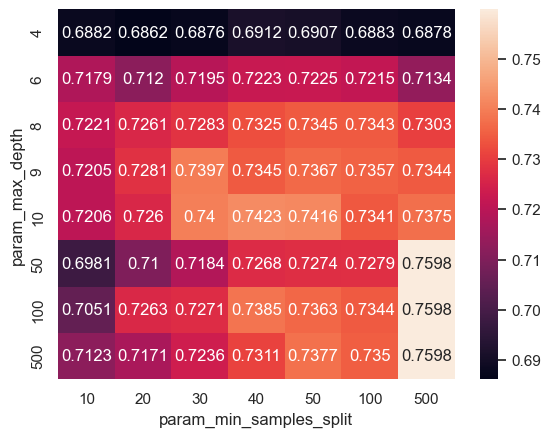

In [327]:
warnings.filterwarnings("ignore")
Grid_search(x_train_bow,y_train)

In [328]:
depth=50
split=500

In [620]:
def test_data(x_train,y_train,x_test,y_test):
     
    model=DecisionTreeClassifier(max_depth=depth, min_samples_split =split, class_weight='balanced') 
   
    model.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

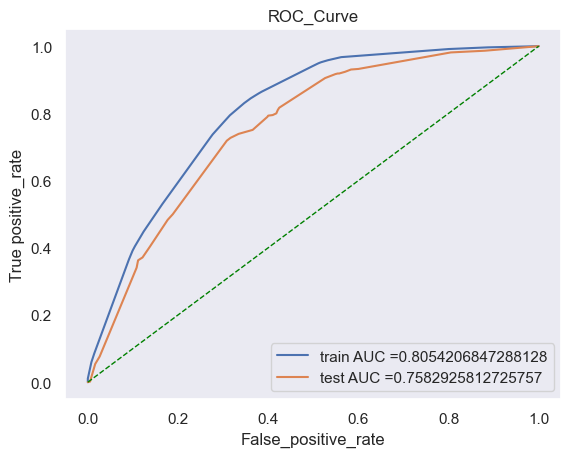

The AUC_score of test_data is : 0.7582925812725757


In [330]:
test_data(x_train_bow,y_train_binary,x_test_bow,y_test_binary)

In [331]:
def metric(x_train,y_train,x_test,y_test):
    
    model=DecisionTreeClassifier(max_depth=depth, min_samples_split =split, class_weight='balanced')
    
    model.fit(x_train, y_train)
    with open('DecisionTree_BOW.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.75      0.60      0.67       610
    positive       0.66      0.79      0.72       590

    accuracy                           0.69      1200
   macro avg       0.70      0.70      0.69      1200
weighted avg       0.70      0.69      0.69      1200



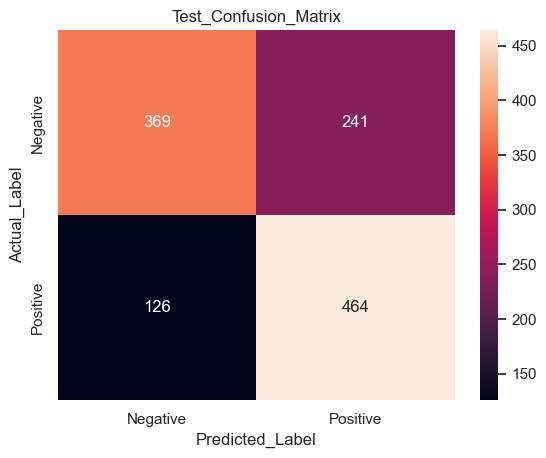

In [332]:
metric(x_train_bow,y_train,x_test_bow,y_test)

In [333]:
#Just to check the pickle loaded model
with open('DecisionTree_BOW.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_bow)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.75      0.60      0.67       610
    positive       0.66      0.79      0.72       590

    accuracy                           0.69      1200
   macro avg       0.70      0.70      0.69      1200
weighted avg       0.70      0.69      0.69      1200



### Apply Decision Trees on TF-IDF


**********AUC Score for CV data **********


Optimal depth: 10

Optimal split: 500

Best Score: 0.73336127324504


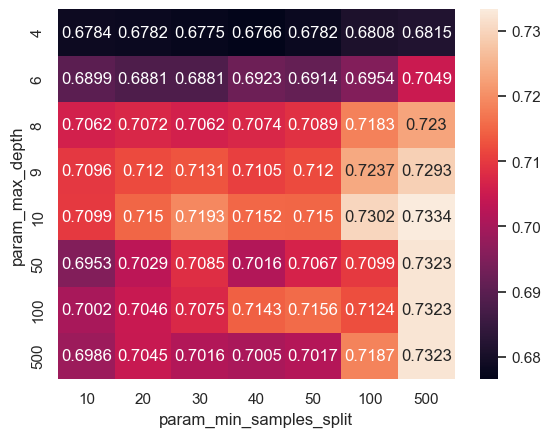

In [621]:
warnings.filterwarnings("ignore")
Grid_search(x_train_tf_idf,y_train)

In [622]:
depth=10
split=500

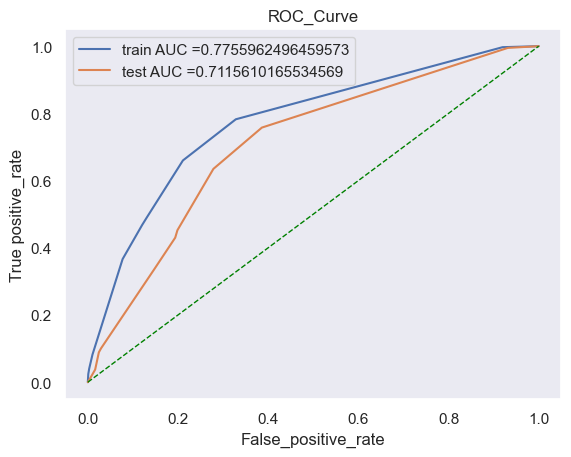

The AUC_score of test_data is : 0.7115610165534569


In [623]:
test_data(x_train_tf_idf,y_train_binary,x_test_tf_idf,y_test_binary)

In [624]:
def metric(x_train,y_train,x_test,y_test):
    
    model=DecisionTreeClassifier(max_depth=depth, min_samples_split =split, class_weight='balanced')
    
    model.fit(x_train, y_train)
    with open('DecisionTree_TFIDF.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.73      0.61      0.67       614
    positive       0.65      0.76      0.70       586

    accuracy                           0.68      1200
   macro avg       0.69      0.69      0.68      1200
weighted avg       0.69      0.68      0.68      1200



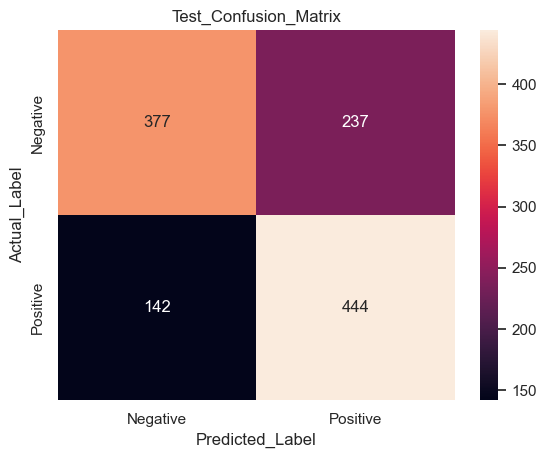

In [625]:
metric(x_train_tf_idf,y_train,x_test_tf_idf,y_test)

In [626]:
#Just to check the pickle loaded model
with open('DecisionTree_tfidf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tf_idf)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.73      0.61      0.67       614
    positive       0.65      0.76      0.70       586

    accuracy                           0.68      1200
   macro avg       0.69      0.69      0.68      1200
weighted avg       0.69      0.68      0.68      1200



### Apply Decision Trees on Avg-W2V


**********AUC Score for CV data **********


Optimal depth: 50

Optimal split: 30

Best Score: 0.5230919892145972


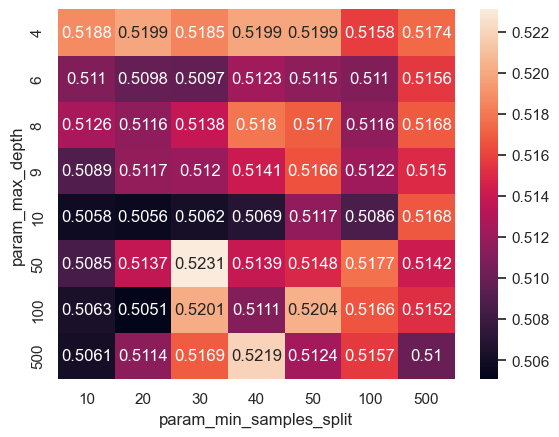

In [340]:
warnings.filterwarnings("ignore")
Grid_search(x_train_avg_w2v,y_train)

In [341]:
depth=500
split=500

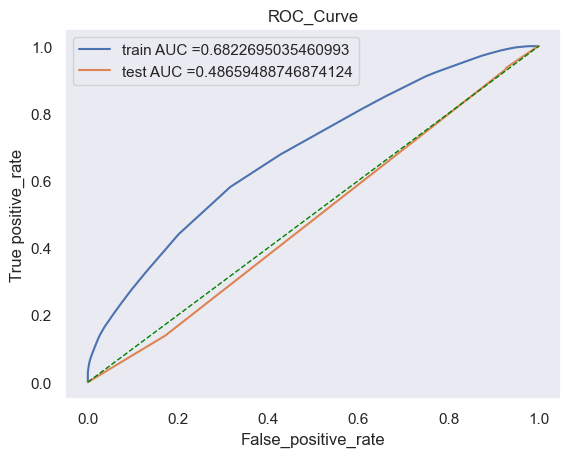

The AUC_score of test_data is : 0.48659488746874124


In [342]:
test_data(x_train_avg_w2v,y_train_binary,x_test_avg_w2v,y_test_binary)

In [343]:
def metric(x_train,y_train,x_test,y_test):
    
    model=DecisionTreeClassifier(max_depth=depth, min_samples_split =split, class_weight='balanced')
    
    model.fit(x_train, y_train)
    with open('DecisionTree_avgw2v.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.50      0.83      0.62       610
    positive       0.44      0.14      0.21       590

    accuracy                           0.49      1200
   macro avg       0.47      0.48      0.42      1200
weighted avg       0.47      0.49      0.42      1200



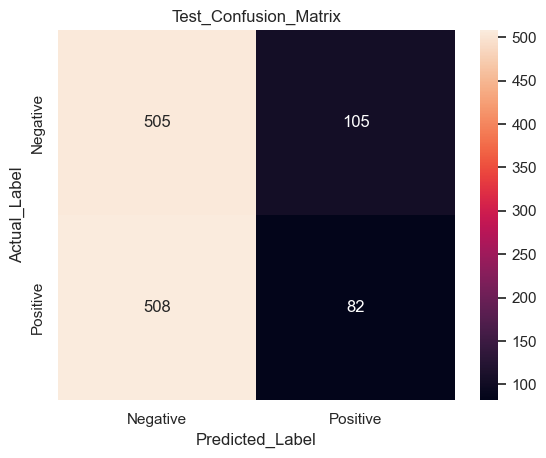

In [344]:
metric(x_train_avg_w2v,y_train,x_test_avg_w2v,y_test)

In [346]:
#Just to check the pickle loaded model
with open('DecisionTree_avgw2v.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_avg_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.50      0.83      0.62       610
    positive       0.44      0.14      0.21       590

    accuracy                           0.49      1200
   macro avg       0.47      0.48      0.42      1200
weighted avg       0.47      0.49      0.42      1200



### Applying Decision Trees on TF-IDF_W2V


**********AUC Score for CV data **********


Optimal depth: 10

Optimal split: 30

Best Score: 0.5219516275821925


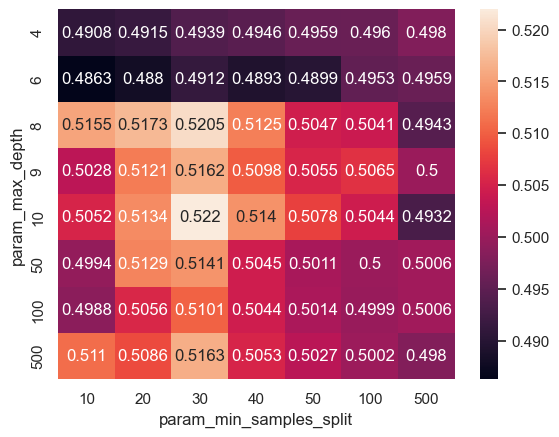

In [347]:
warnings.filterwarnings("ignore")
Grid_search(x_train_tfidf_w2v,y_train)

In [348]:
depth=500
split=40

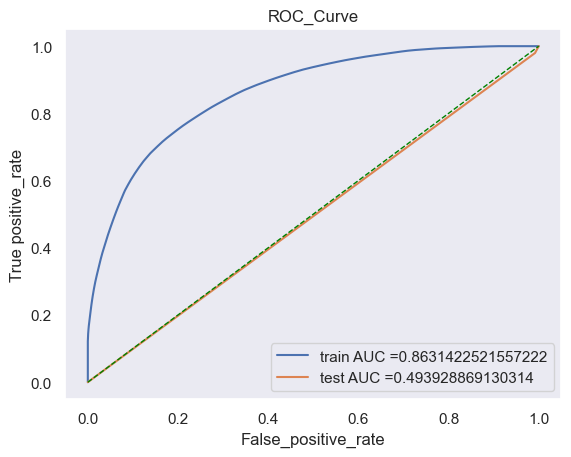

The AUC_score of test_data is : 0.493928869130314


In [349]:
test_data(x_train_tfidf_w2v,y_train_binary,x_test_tfidf_w2v,y_test_binary)

In [350]:
def metric(x_train,y_train,x_test,y_test):
    
    model=DecisionTreeClassifier(max_depth=depth, min_samples_split =split, class_weight='balanced')
    
    model.fit(x_train, y_train)
    with open('DecisionTree_tfidf_w2v.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       610
    positive       0.49      1.00      0.66       590

    accuracy                           0.49      1200
   macro avg       0.25      0.50      0.33      1200
weighted avg       0.24      0.49      0.32      1200



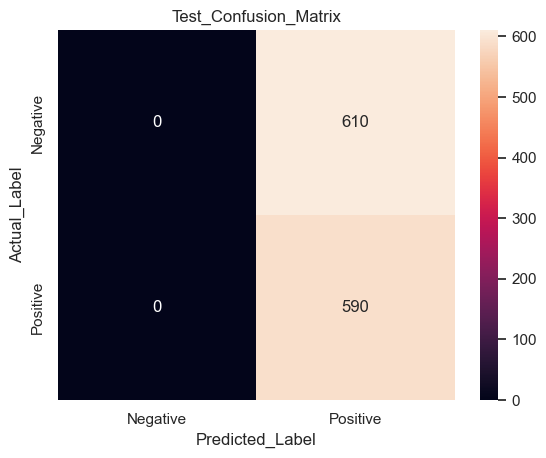

In [351]:
metric(x_train_tfidf_w2v,y_train,x_test_tfidf_w2v,y_test)

In [352]:
#Just to check the pickle loaded model
with open('DecisionTree_tfidf_w2v.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tfidf_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       610
    positive       0.49      1.00      0.66       590

    accuracy                           0.49      1200
   macro avg       0.25      0.50      0.33      1200
weighted avg       0.24      0.49      0.32      1200



In [353]:
table = PrettyTable()
table.field_names = ["Vectorizer","Optimal Min_split", "Optimal Depth", "AUC_Score"]
table.add_row(["BOW",50,500,75.75])
table.add_row(["TFIDF",10,500,72.49])
table.add_row(["AvgW2v",500,500,47.81])
table.add_row(["TFIDF_AvgW2v",40,500,50.88])
print(table)

+--------------+-------------------+---------------+-----------+
|  Vectorizer  | Optimal Min_split | Optimal Depth | AUC_Score |
+--------------+-------------------+---------------+-----------+
|     BOW      |         50        |      500      |   75.75   |
|    TFIDF     |         10        |      500      |   72.49   |
|    AvgW2v    |        500        |      500      |   47.81   |
| TFIDF_AvgW2v |         40        |      500      |   50.88   |
+--------------+-------------------+---------------+-----------+


### Observation:

1) From the above table we conclude that Bag of Words with a optimal Depth of 50 and optimal min_split of 500 have the Highest AUC score i.e 75.75 %

# Apply Randomforest on BOW

In [629]:
from sklearn.ensemble import RandomForestClassifier
def Grid_search(model,X_train,Y_train):
    estimators = [50,100,200,300,400,500]
    Depths = [10,20,30,40,50,60]

    param_grid = {'max_depth': Depths, 'n_estimators': estimators}
    
    clf = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1, pre_dispatch=2,return_train_score=True)
    clf.fit(X_train, Y_train)

   
    print("\n**********AUC Score for CV data **********\n")
    print("\nOptimal depth:", clf.best_estimator_.max_depth)
    print("\nOptimal estimators:", clf.best_estimator_.n_estimators)
    print("\nBest Score:", clf.best_score_)

    sns.set()
    df_gridsearch = pd.DataFrame(clf.cv_results_)
    max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.show()


**********AUC Score for CV data **********


Optimal depth: 20

Optimal estimators: 500

Best Score: 0.8839845431587777


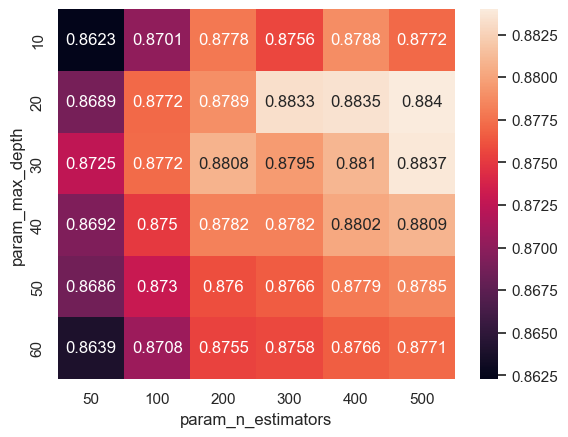

In [356]:
warnings.filterwarnings("ignore")
model=RandomForestClassifier()
Grid_search(model,x_train_bow,y_train)

In [357]:
depth=20
estimators=400

In [630]:
def test_data(model,x_train,y_train,x_test,y_test):
     
   
    model.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

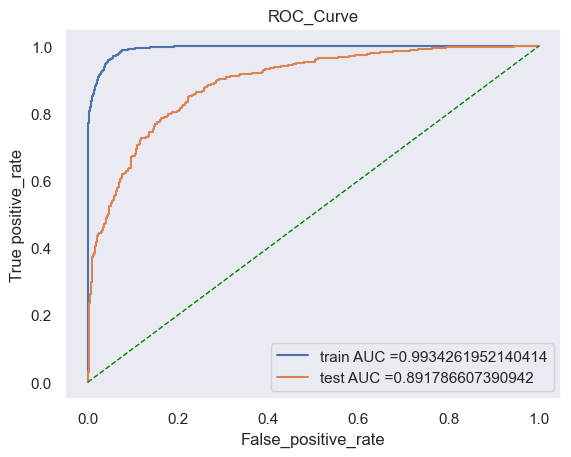

The AUC_score of test_data is : 0.891786607390942


In [359]:
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,x_train_bow,y_train_binary,x_test_bow,y_test_binary)

In [360]:
def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    with open('RandomForest_BOW.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.80      0.80      0.80       610
    positive       0.80      0.79      0.80       590

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



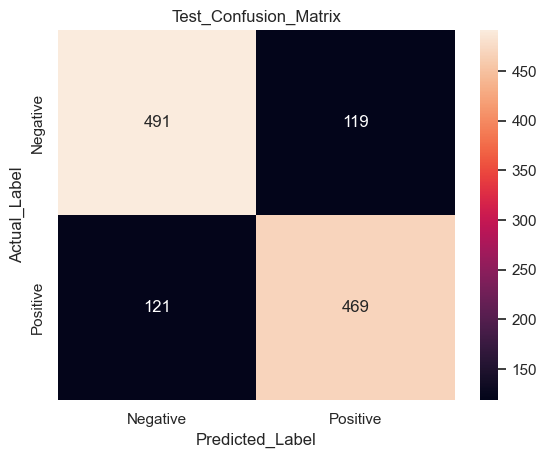

In [361]:
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,x_train_bow,y_train,x_test_bow,y_test)

In [362]:
#Just to check the pickle loaded model
with open('RandomForest_BOW.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_bow)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.80      0.80      0.80       610
    positive       0.80      0.79      0.80       590

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



# Apply Randomforest on TF-IDF


**********AUC Score for CV data **********


Optimal depth: 50

Optimal estimators: 400

Best Score: 0.8993434191818747


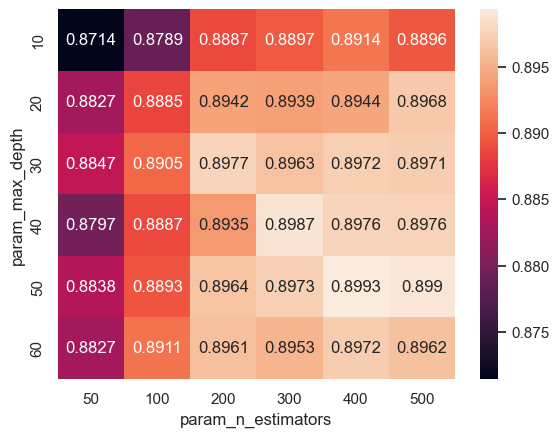

In [631]:
warnings.filterwarnings("ignore")
model=RandomForestClassifier()
Grid_search(model,x_train_tf_idf,y_train)

In [632]:
depth=30
estimators=400

In [633]:
def test_data(model,x_train,y_train,x_test,y_test):
     
   
    model.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

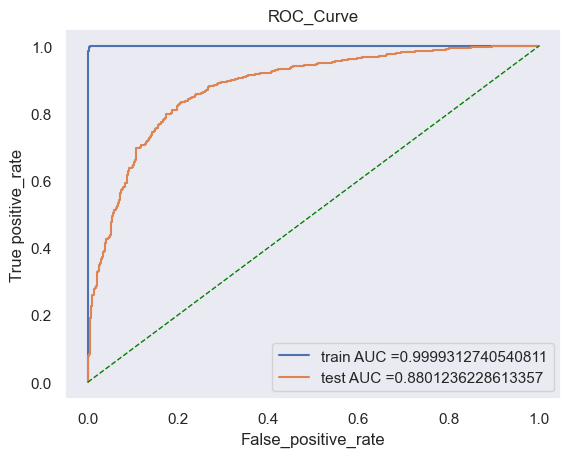

The AUC_score of test_data is : 0.8801236228613357


In [634]:
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,x_train_tf_idf,y_train_binary,x_test_tf_idf,y_test_binary)

In [635]:
def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    with open('RandomForest_TFIDF.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.82      0.79      0.81       614
    positive       0.79      0.82      0.81       586

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



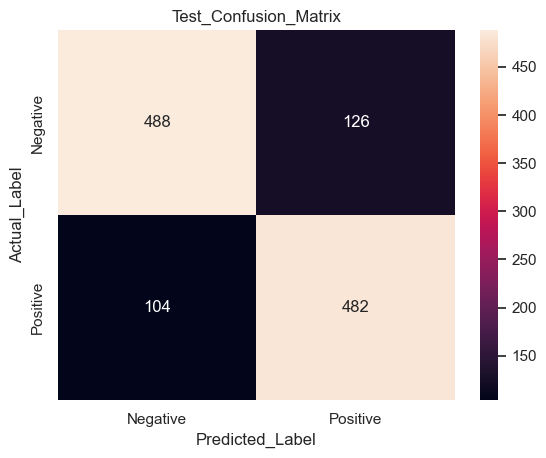

In [636]:
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,x_train_tf_idf,y_train,x_test_tf_idf,y_test)

In [637]:
#Just to check the pickle loaded model
with open('RandomForest_TFIDF.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tf_idf)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.82      0.79      0.81       614
    positive       0.79      0.82      0.81       586

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



# Apply RandomForest on Avg-W2V


**********AUC Score for CV data **********


Optimal depth: 40

Optimal estimators: 50

Best Score: 0.5094279937428924


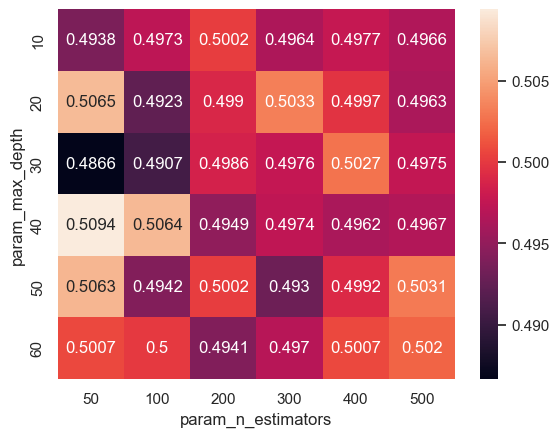

In [377]:
warnings.filterwarnings("ignore")
model=RandomForestClassifier()
Grid_search(model,x_train_avg_w2v,y_train)

In [378]:
depth=60
estimators=100

In [379]:
def test_data(model,x_train,y_train,x_test,y_test):
     
   
    model.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

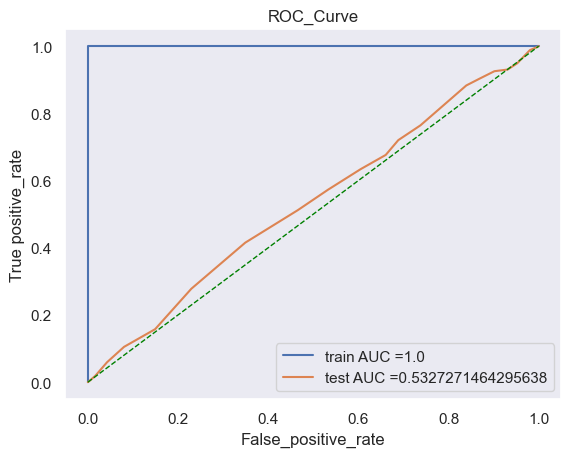

The AUC_score of test_data is : 0.5327271464295638


In [380]:
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,x_train_avg_w2v,y_train_binary,x_test_avg_w2v,y_test_binary)

In [381]:
def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    with open('RandomForest_avgw2v.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.52      0.38      0.44       610
    positive       0.50      0.63      0.56       590

    accuracy                           0.50      1200
   macro avg       0.51      0.51      0.50      1200
weighted avg       0.51      0.50      0.50      1200



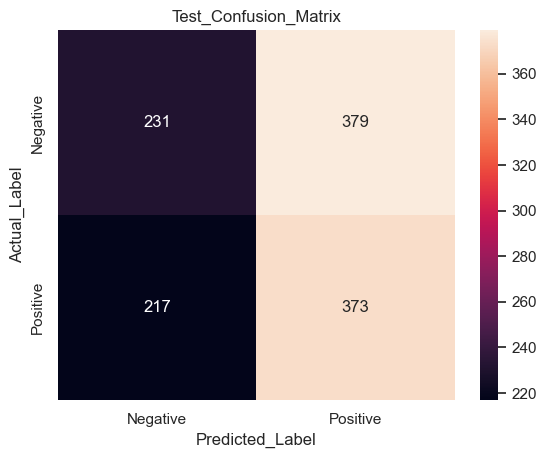

In [382]:
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,x_train_avg_w2v,y_train,x_test_avg_w2v,y_test)

In [383]:
#Just to check the pickle loaded model
with open('RandomForest_avgw2v.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_avg_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.52      0.38      0.44       610
    positive       0.50      0.63      0.56       590

    accuracy                           0.50      1200
   macro avg       0.51      0.51      0.50      1200
weighted avg       0.51      0.50      0.50      1200



# Applying RandomForest on TF_IDF_W2V


**********AUC Score for CV data **********


Optimal depth: 30

Optimal estimators: 50

Best Score: 0.507559008999016


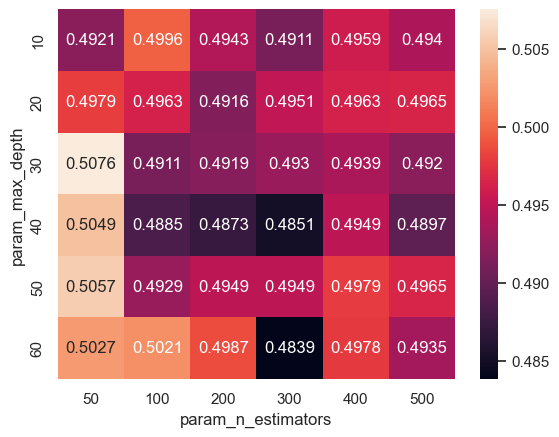

In [384]:
warnings.filterwarnings("ignore")
model=RandomForestClassifier()
Grid_search(model,x_train_tfidf_w2v,y_train)

In [385]:
depth=60
estimators=50

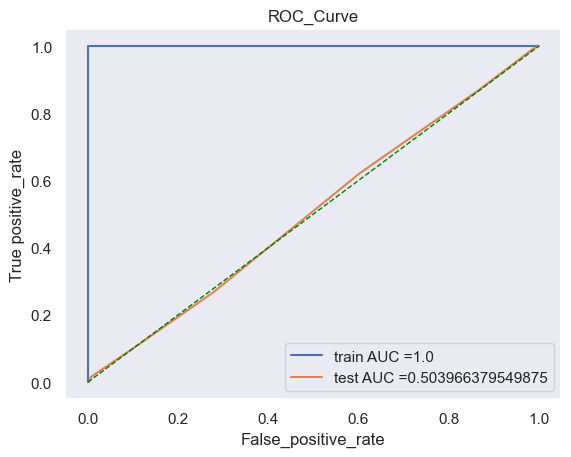

The AUC_score of test_data is : 0.503966379549875


In [386]:
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,x_train_tfidf_w2v,y_train_binary,x_test_tfidf_w2v,y_test_binary)

In [387]:
def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    with open('RandomForest_tfidfw2v.pkl', 'wb') as file:
        pickle.dump(model, file)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

    negative       0.53      0.65      0.59       610
    positive       0.53      0.41      0.46       590

    accuracy                           0.53      1200
   macro avg       0.53      0.53      0.53      1200
weighted avg       0.53      0.53      0.53      1200



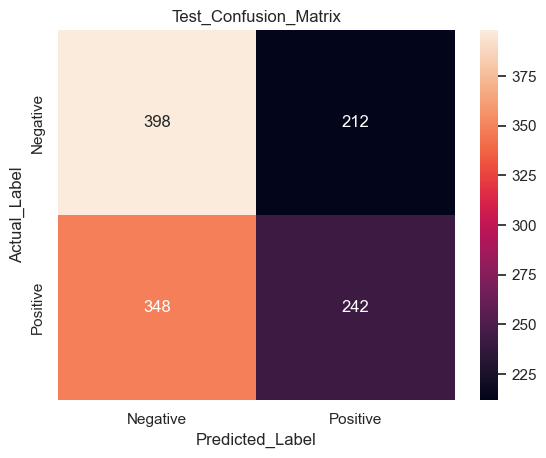

In [388]:
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,x_train_tfidf_w2v,y_train,x_test_tfidf_w2v,y_test)

In [389]:
#Just to check the pickle loaded model
with open('RandomForest_tfidfw2v.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predict=loaded_model.predict(x_test_tfidf_w2v)
conf_mat = confusion_matrix(y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

    negative       0.53      0.65      0.59       610
    positive       0.53      0.41      0.46       590

    accuracy                           0.53      1200
   macro avg       0.53      0.53      0.53      1200
weighted avg       0.53      0.53      0.53      1200



In [390]:
table = PrettyTable()
table.field_names = ["Model","Vectorizer","Optimal Depth", "Optimal n_estimator", "AUC_Score"]
table.add_row(["Random Forest","BOW",20,400,88.66])
table.add_row(["Random Forest","TFIDF",30,400,90.40])
table.add_row(["Random Forest","AvgW2v",60,100,51.35])
table.add_row(["Random Forest","TFIDF_AvgW2v",60,50,49.4])
print(table)

+---------------+--------------+---------------+---------------------+-----------+
|     Model     |  Vectorizer  | Optimal Depth | Optimal n_estimator | AUC_Score |
+---------------+--------------+---------------+---------------------+-----------+
| Random Forest |     BOW      |       20      |         400         |   88.66   |
| Random Forest |    TFIDF     |       30      |         400         |    90.4   |
| Random Forest |    AvgW2v    |       60      |         100         |   51.35   |
| Random Forest | TFIDF_AvgW2v |       60      |          50         |    49.4   |
+---------------+--------------+---------------+---------------------+-----------+


# Observation:

1) From the above table we conclude that TFIDF in Random Forest with a optimal Depth of 30 and optimal estimator of 400 have the Highest AUC score i.e 90.40 %